# Práctica 43: Limpieza, manejo y transformación de datos con Pandas

####  Cargar el fichero **retail2.csv** en un dataframe de Pandas y efectuar todas las operaciones de consulta, exploración y limpieza de datos que sean necesarios algunos pasos de limpieza están de forma explícita como preguntas. Los ficheros contienen varias columnas y algunas de ellas tienen datos que podrían necesitar limpieza o tratamiento. 

**El fichero contiene información sobre transacciones de una tienda minorista. Los campos y su significado se muestran a continuación:**

`InvoiceNo`: Número de factura que identifica de manera única cada transacción.
  

`StockCode`:Código de stock que identifica de manera única cada producto.
 

`Descrption`.Descripción del producto.


`Quantity`: Cantidad de productos comprados (puede contener valores negativos que indican devoluciones).

`InvoiceDate`: Fecha y hora en que se realizó la transacción.


`UnitPrice`:Precio unitario del producto (algunos valores pueden estar en centavos en lugar de dólares).


`CustomerID`:ID único del cliente que realizó la compra.


`Country`:País donde reside el cliente (puede contener inconsistencias en mayúsculas/minúsculas y caracteres especiales).  

`CustomerName`:Nombre completo del cliente.


`Email`:Dirección de correo electrónico del cliente.  

`Address`:Dirección del cliente.  



`PhoneNumber`:Número de teléfono del cliente.



`Category`: Categoría del producto (por ejemplo, 'Electronics', 'Clothing', 'Home & Garden').

`Supplier`: Proveedor del producto.  

`StockLevel`: Nivel de inventario del producto.

`Discount`: Descuento aplicado al producto (en porcentaje).  

`SaleChannel`: Canal de venta (por ejemplo, 'Online', 'In-Store').

`ReturnStatus`: Estado de devolución del producto ('Returned', 'Not Returned').

`ProductWeight`: Peso del producto. Unidad: kilogramos.

`ProductDimensions`: Dimensiones del producto. Unidad: en el formato 'LxWxH cm'.

`ShippingCost`: Costo de envío. Unidad:dólares.

`SalesRegion`: Región de ventas (por ejemplo, 'North America', 'Europe', 'Asia').  

`PromotionCode`: Código de promoción aplicado a la compra.

`PaymentMethod`: Método de pago (por ejemplo, 'Credit Card', 'PayPal', 'Bank Transfer').


# Parte 1. Data Cleaning and Preparation (Capítulo 7 - Wes McKinney)

- Cargue los datasets `retail2.csv` y `exchange_rates.csv` en DataFrames de pandas.

In [333]:
# Importación biblioteca pandas
import pandas as pd

In [334]:
# Lectura fichero csv 
# retail2_df = pd.read_csv("../data/retail2.csv", sep=',', header=0, index_col=0) # Con argumentos
retail2_df = pd.read_csv("../data/retail2.csv") # Sin argumentos
# Visualización
retail2_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6,12/1/2010 12:28,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,100,12/1/2010 10:16,795.0,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 13:23,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10,12/1/2010 11:32,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6,12/1/2010 11:07,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,435,20.04,Online,Not Returned,1.64,70x31x19 cm,13.39,Australia,PROMO10,Bank Transfer


In [335]:
# Lectura fichero csv 
exchange_rates_df = pd.read_csv("../data/exchange_rates.csv")
# Visualización
exchange_rates_df.head()

,Date,ExchangeRate
0,2020-01-01,1.20
1,2020-01-02,1.19
2,2020-01-03,1.18
3,2020-01-04,1.21
4,2020-01-05,1.20


In [336]:
exchange_rates_df.shape

(60, 2)

## Pregunta 1
**Identificación de valores faltantes:**
- Identifique las columnas con valores faltantes en el dataset `retail`.

In [337]:
# Contabilización valores faltantes por columna
missing_values = retail2_df.isnull().sum()
# Visualización de las columnas con valores faltantes
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

InvoiceNo        20
Description      27
InvoiceDate       5
Country           1
PromotionCode    81
dtype: int64


## Pregunta 2
**Eliminar valores faltantes:**
- Elimine las filas del dataset `retail` donde las columnas críticas (`InvoiceNo`, `StockCode`, `Quantity`, `UnitPrice`, `CustomerID`) tengan valores faltantes.

In [338]:
# Filas x columnas df original
retail2_df.shape

(440, 24)

In [339]:
# Eliminación de filas de las columnas críticas con valores faltantes
critical_columns = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID']
retail2_df = retail2_df.dropna(subset=critical_columns)
# Visualización dataframe limpio
retail2_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6,12/1/2010 12:28,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,100,12/1/2010 10:16,795.0,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 13:23,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10,12/1/2010 11:32,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",6,12/1/2010 14:24,4.25,11946,United Kingdom,Alice Smith,alice.smith@mail.com,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [340]:
# Filas x columnas df limpio
retail2_df.shape

(420, 24)

## Pregunta 3
**Conversión de tipos de datos:**
- Convierta la columna `InvoiceDate` del dataset `retail` a un formato de datetime.

In [341]:
# Tipo de dato de columna 'InvoiceDate' ANTES de transformación
print(retail2_df['InvoiceDate'].dtype)

object


In [342]:
# Función para recoger las fechas que no se pueden transformar
def check_invalid_dates(date_series):
    invalid_dates = []
    for date in date_series:
        try:
            # Intentar convertir la fecha
            pd.to_datetime(date, format='%d/%m/%Y %H:%M')
        except (ValueError, TypeError):
            # Si hay un error, agregar la fecha a la lista de fechas inválidas
            invalid_dates.append(date)
    return invalid_dates

# Aplicar la función a la columna 'InvoiceDate'
invalid_dates = check_invalid_dates(retail2_df['InvoiceDate'])

# Mostrar las fechas problemáticas
invalid_dates

['01/12/2010 25:61',
 '30/02/2010 00:00',
 'Date: 12/1/2010 14:26',
 '30/02/2010 00:00',
 '01-12-2010 10:09',
 'Date: 12/1/2010 13:46',
 '01/12/2010 25:61',
 '01/12/2010 25:61',
 '01/12/2010 25:61',
 '01/12/2010 25:61',
 '01-12-2010 11:27',
 'Date: 12/1/2010 9:14',
 'Date: 01/01/2050 00:00',
 '01/12/2010 25:61',
 'Date: 12/1/2010 9:23',
 '01-12-2010 09:47',
 '30/02/2010 00:00',
 '01/12/2010 25:61',
 '01/12/2010 25:61',
 'Date: 12/1/2010 11:05',
 '01/12/2010 25:61',
 'Date: 12/1/2010 15:02',
 '30/02/2010 00:00',
 'Date: 12/1/2010 14:47',
 '01-12-2010 13:42',
 '30/02/2010 00:00',
 'Date: 12/1/2010 9:33',
 '30/02/2010 00:00',
 '01/12/2010 25:61',
 'Date: 12/1/2010 14:43']

In [343]:
import numpy as np

def clean_date(date):
    if pd.isna(date):
        return np.nan
    # Transformación de tipo('InvoiceDate': object -> 'CleanedInvoiceDate': string)
    date_str = str(date)
    # Eliminación de espacios
    date_str = date_str.strip()
    # Elimina non-breaking spaces y otros caracteres
    date_str = date_str.replace('\xa0', ' ').strip()
    # Eliminación de espacios múltiples
    import re
    date_str = re.sub(r'\s+', ' ', date_str).strip()  
    # TEST:
    # print([c for c in date_str]) # Muestra cada carácter en la cadena
    # print(date_str.encode('utf-8')) # Muestra la representación en bytes

    # Eliminar prefijo "Date:"
    date_str = date_str.split('Date:')[-1]
    # Clave para fechas que además de ir precedidas de la cadena 'Date:' 
    # también llevan un espacio antes
    date_str = date_str.strip()
    # Reemplazar los separadores de fecha no estándar
    date_str = date_str.replace('-', '/')
    # Test
    # print(f"** CLEANED Date: {date_str}")
    
    # Comprobación si la fecha es Febrero y tiene 28 días de máximo
    month_numb = int(date_str.split(' ')[0].split('/')[1])
    if month_numb == 2:
        day_numb = int(date_str.split(' ')[0].split('/')[0])
        if day_numb > 28:
            date_str = date_str.replace(date_str.split(' ')[0].split('/')[0], '28')

    # Extracción de la hora y los minutos de la fecha
    # y conversión a entero
    hour_numb = int(date_str.split(' ')[1].split(':')[0])
    min_numb = int(date_str.split(' ')[1].split(':')[1])
    # Comprobación de hora y minuto y cambio en la fecha de tipo string
    if hour_numb > 23:
        date_str = date_str.replace(date_str.split(' ')[1].split(':')[0], '00')        
    if min_numb > 59:
        date_str = date_str.replace(date_str.split(' ')[1].split(':')[1], '59')
    
    return date_str

# Aplicar la limpieza
retail2_df['CleanedInvoiceDate'] = retail2_df['InvoiceDate'].apply(clean_date)
# Conversión forzada de columna 'InvoiceDate' a datetime
# retail2_df['InvoiceDate'] = pd.to_datetime(retail2_df['CleanedInvoiceDate'], 
#                                           format='%d/%m/%Y %H:%M', 
#                                           errors='coerce')
#print(retail2_df.head(20))
retail2_df['CleanedInvoiceDate'] = pd.to_datetime(retail2_df['CleanedInvoiceDate'], 
                                                    format='%d/%m/%Y %H:%M', 
                                                    errors='coerce')
retail2_df[15:25]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,CleanedInvoiceDate
16,536676.0,22749,***FELTCRAFT PRINCESS CHARLOTTE DOLL***,8,01/12/2010 25:61,3.75,15085,### FELTCRAFT PRINCESS CHARLOTTE DOLL ###,John Johnson,john.johnson@example.com,...,46.12,Online,Returned,3.11,45x61x47 cm,17.01,Australia,DISCOUNT5,Gift Card,2010-12-01 00:59:00
17,536375.0,22960,"[""description"": ""JAM MAKING SET WITH JARS: det...",6,30/02/2010 00:00,4.25,15637,United Kingdom,Grace Wilson,grace.wilson@example.com,...,35.36,In-Store,Not Returned,5.30,21x80x85 cm,8.00,South America,SALE15,Bank Transfer,2010-02-28 00:00:00
18,536457.0,22960,***JAM MAKING SET WITH JARS***,6,12/1/2010 10:27,4.25,11116,United Kingdom,Alice Taylor,alice.taylor@demo.net,...,7.63,Online,Not Returned,4.38,75x36x99 cm,7.51,South America,PROMO10,Cash,2010-01-12 10:27:00
19,536696.0,22112,CHOCOLATE HOT WATER BOTTLE,10,Date: 12/1/2010 14:26,3.39,10492,United Kingdom,Bob Wilson,bob.wilson@example.com,...,28.81,Online,Returned,2.98,19x20x57 cm,6.57,South America,DISCOUNT5,PayPal,2010-01-12 14:26:00
20,536695.0,22139,RETROSPOT TEA SET CERAMIC 11 PC,-6,12/1/2010 14:25,6.95,18811,United Kingdom,John Johnson,john.johnson@demo.net,...,30.34,In-Store,Not Returned,6.16,18x47x49 cm,14.55,Europe,PROMO20,Cash,2010-01-12 14:25:00
21,536443.0,22112,CHOCOLATE HOT WATER BOTTLE,10,12/1/2010 10:13,3.39,17888,United Kingdom,Eva Jones,eva.jones@demo.net,...,21.21,Online,Returned,1.48,14x15x31 cm,15.60,Australia,DISCOUNT5,Credit Card,2010-01-12 10:13:00
22,536587.0,21724,RED HARMONICA IN BOX,10,12/1/2010 12:37,1.25,16474,United Kingdom,David Taylor,david.taylor@demo.net,...,36.82,Online,Not Returned,2.99,1x54x3 cm,5.47,South America,DISCOUNT5,Credit Card,2010-01-12 12:37:00
23,536628.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,30/02/2010 00:00,3.39,19738,United Kingdom,Alice Smith,alice.smith@example.com,...,46.72,In-Store,Returned,3.73,16x87x57 cm,19.04,Australia,NaN,Gift Card,2010-02-28 00:00:00
26,536683.0,21777,"{""description"": ""RECIPE BOX WITH METAL HEART""}",4,12/1/2010 14:13,7.95,19467,United Kingdom,David Wilson,david.wilson@mail.com,...,5.66,Online,Not Returned,2.08,76x24x28 cm,15.64,South America,SALE15,Cash,2010-01-12 14:13:00
27,536608.0,22112,CHOCOLATE HOT WATER BOTTLE,10,12/1/2010 12:58,3.39,12743,United Kingdom,Alice Johnson,alice.johnson@example.com,...,49.24,In-Store,Not Returned,5.19,8x92x36 cm,18.06,Australia,PROMO20,Credit Card,2010-01-12 12:58:00


In [344]:
# Reordenación Columnas
# IMPORTANTE: Hay que convertir 'retail2_df.columns' de 'index' a 'list'
old_order_list = list(retail2_df.columns)
new_order_list = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 
                  'InvoiceDate', 'CleanedInvoiceDate','UnitPrice', 'CustomerID', 'Country',
                  'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier',
                  'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight',
                  'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 
                  'PaymentMethod']
retail2_df = retail2_df[new_order_list]
retail2_df[16:24]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CleanedInvoiceDate,UnitPrice,CustomerID,Country,CustomerName,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
17,536375.0,22960,"[""description"": ""JAM MAKING SET WITH JARS: det...",6,30/02/2010 00:00,2010-02-28 00:00:00,4.25,15637,United Kingdom,Grace Wilson,...,435,35.36,In-Store,Not Returned,5.30,21x80x85 cm,8.00,South America,SALE15,Bank Transfer
18,536457.0,22960,***JAM MAKING SET WITH JARS***,6,12/1/2010 10:27,2010-01-12 10:27:00,4.25,11116,United Kingdom,Alice Taylor,...,447,7.63,Online,Not Returned,4.38,75x36x99 cm,7.51,South America,PROMO10,Cash
19,536696.0,22112,CHOCOLATE HOT WATER BOTTLE,10,Date: 12/1/2010 14:26,2010-01-12 14:26:00,3.39,10492,United Kingdom,Bob Wilson,...,994,28.81,Online,Returned,2.98,19x20x57 cm,6.57,South America,DISCOUNT5,PayPal
20,536695.0,22139,RETROSPOT TEA SET CERAMIC 11 PC,-6,12/1/2010 14:25,2010-01-12 14:25:00,6.95,18811,United Kingdom,John Johnson,...,308,30.34,In-Store,Not Returned,6.16,18x47x49 cm,14.55,Europe,PROMO20,Cash
21,536443.0,22112,CHOCOLATE HOT WATER BOTTLE,10,12/1/2010 10:13,2010-01-12 10:13:00,3.39,17888,United Kingdom,Eva Jones,...,249,21.21,Online,Returned,1.48,14x15x31 cm,15.60,Australia,DISCOUNT5,Credit Card
22,536587.0,21724,RED HARMONICA IN BOX,10,12/1/2010 12:37,2010-01-12 12:37:00,1.25,16474,United Kingdom,David Taylor,...,166,36.82,Online,Not Returned,2.99,1x54x3 cm,5.47,South America,DISCOUNT5,Credit Card
23,536628.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,30/02/2010 00:00,2010-02-28 00:00:00,3.39,19738,United Kingdom,Alice Smith,...,481,46.72,In-Store,Returned,3.73,16x87x57 cm,19.04,Australia,NaN,Gift Card
26,536683.0,21777,"{""description"": ""RECIPE BOX WITH METAL HEART""}",4,12/1/2010 14:13,2010-01-12 14:13:00,7.95,19467,United Kingdom,David Wilson,...,542,5.66,Online,Not Returned,2.08,76x24x28 cm,15.64,South America,SALE15,Cash


In [345]:
# Filtrar filas con problemas
# La virgulilla se utiliza para seleccionar las filas donde la conversión de fecha falló, 
# es decir, donde InvoiceDate no pudo convertirse correctamente a una fecha válida
problem_rows = retail2_df[~pd.to_datetime(retail2_df['InvoiceDate'], 
                                          errors='coerce', 
                                          dayfirst=True).notna()]
print(problem_rows)

     InvoiceNo                       StockCode  \
16    536676.0                           22749   
17    536375.0                           22960   
19    536696.0                           22112   
23    536628.0                          84029G   
32    536439.0                           21914   
49    536584.0  SET 2 TEA TOWELS I LOVE LONDON   
54    536656.0                           21731   
58    536455.0                           21914   
82    536432.0                           21756   
90    536605.0                           21731   
105   536630.0                           22752   
114   536517.0                           21731   
116   536384.0                           22570   
173   536519.0                           22139   
174   536390.0                           22752   
183   536393.0                           22111   
195   536475.0                           22748   
223   536417.0                           21730   
231   536604.0                           21914   


In [346]:
# Tipo de dato de columna 'InvoiceDate'
print(retail2_df['InvoiceDate'].dtype)

object


In [347]:
# Tipo de dato de columna 'CleanedInvoiceDate' DESPUÉS de transformación
print(retail2_df['CleanedInvoiceDate'].dtype)

datetime64[ns]


## Pregunta 4
**Conversión de tipos de datos en tasas de cambio:**
- Convierta la columna `Date` del dataset `exchange_rates.csv` a un formato de datetime.

In [348]:
exchange_rates_df['Date'] = pd.to_datetime(exchange_rates_df['Date'])
exchange_rates_df.head()

,Date,ExchangeRate
0,2020-01-01,1.20
1,2020-01-02,1.19
2,2020-01-03,1.18
3,2020-01-04,1.21
4,2020-01-05,1.20


In [349]:
exchange_rates_df.shape

(60, 2)

## Pregunta 5
**Filtrado de datos por país:**
- Filtre el dataset `retail` para mostrar solo las transacciones realizadas en el país 'United Kingdom'.

In [350]:
# Comprobación de todos los valores de columna 'Country'
country_list = list(retail2_df['Country'])
print(country_list)

['United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', '### FELTCRAFT PRINCESS CHARLOTTE DOLL ###', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 

In [351]:
import pandas as pd

# Paso 1: Verificar las variantes de 'United Kingdom'
print(retail2_df['Country'].unique())  # Esto mostrará todas las variaciones en la columna 'Country'

['United Kingdom' '### FELTCRAFT PRINCESS CHARLOTTE DOLL ###'
 'KNITTED UNION FLAG HOT WATER BOTTLE' 'U.K.'
 'STRIPED CHARLIE+LOLA CHARLOTTE BAG: details' 'Germany'
 '### united kingdom ###' 'BOX OF VINTAGE JIGSAW BLOCKS' 'united kingdom'
 'England' 'SCANDINAVIAN REDS RIBBONS'
 '### CHOCOLATE HOT WATER BOTTLE ###' 'Denmark' nan '### U.K. ###'
 'BOX OF VINTAGE ALPHABET BLOCKS' 'RED HARMONICA IN BOX']


In [352]:
import pandas as pd
import numpy as np
import re

# Paso 1: Lista de variantes de 'United Kingdom'
variantes_uk = ['United Kingdom', 'UK', 'U.K.', 'united kingdom']

# Paso 2: Función para limpiar y unificar nombres de países
def clean_country_name(country_name):
    if pd.isna(country_name) or isinstance(country_name, (float, int)):
        return np.nan
    # Eliminar caracteres especiales y convertir a minúsculas
    country_name = re.sub(r'[^\w\s]', '', country_name).strip().lower()
    # Unificar nombres basados en la lista de variantes
    return 'United Kingdom' if country_name in [name.lower() for name in variantes_uk] else country_name

# Paso 3: Crear la nueva columna 'CleanedCountry' con valor 'United Kingdom' unificado
retail2_df['CleanedCountry'] = retail2_df['Country'].apply(clean_country_name)

# Verificar la nueva columna
#print(retail2_df[['Country', 'CleanedCountry']].head())

In [353]:
""" import re
import numpy as np

# Paso 1: Definir la expresión regular para las variantes de 'United Kingdom'
regex_uk = r'\b(?:united\s*kingdom|u\.?k\.?)\b'

# Paso 2: Crear la nueva columna 'CleanedCountry', manejando NaN y aplicando la expresión regular
retail2_df['CleanedCountry'] = retail2_df['Country'].apply(
    lambda x: 'United Kingdom' if isinstance(x, str) and re.search(regex_uk, x, re.IGNORECASE) else x
)

# Paso 3: Verificar la nueva columna
# Mostrar las primeras filas para comparar las columnas
#print(retail2_df[['Country', 'CleanedCountry']].head()) """

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bytetech\AppData\Local\Temp\ipykernel_652\4001145465.py:1: SyntaxWarning: invalid escape sequence '\s'
  """ import re


" import re\nimport numpy as np\n\n# Paso 1: Definir la expresión regular para las variantes de 'United Kingdom'\nregex_uk = r'\x08(?:united\\s*kingdom|u\\.?k\\.?)\x08'\n\n# Paso 2: Crear la nueva columna 'CleanedCountry', manejando NaN y aplicando la expresión regular\nretail2_df['CleanedCountry'] = retail2_df['Country'].apply(\n    lambda x: 'United Kingdom' if isinstance(x, str) and re.search(regex_uk, x, re.IGNORECASE) else x\n)\n\n# Paso 3: Verificar la nueva columna\n# Mostrar las primeras filas para comparar las columnas\n#print(retail2_df[['Country', 'CleanedCountry']].head()) "

In [354]:
# Paso 1: Lista de variantes de 'United Kingdom'
#variantes_uk = ['United Kingdom', 'UK', 'U.K.', 'united kingdom']

# Paso 2: Crear la nueva columna 'CleanedCountry' con valor 'United Kingdom' unificado
#retail2_df['CleanedCountry'] = retail2_df['Country'].apply(lambda x: 'United Kingdom' if x in variantes_uk else x)

# Paso 3: Verificar la nueva columna
# Mostrar las primeras filas para comparar las columnas
#retail2_df[['Country', 'CleanedCountry']]

In [355]:
# Slice para comprobar diferencias entre columnas 'Country'-'CleanedCountry'
retail2_df_slice = retail2_df.loc[95:102, ['Country', 'CleanedCountry']]
retail2_df_slice


,Country,CleanedCountry
95,United Kingdom,United Kingdom
96,United Kingdom,United Kingdom
97,U.K.,United Kingdom
98,STRIPED CHARLIE+LOLA CHARLOTTE BAG: details,striped charlielola charlotte bag details
99,United Kingdom,United Kingdom
100,United Kingdom,United Kingdom
101,United Kingdom,United Kingdom


In [356]:
# Reordenación de columnas
old_order_list2 = list(retail2_df.columns)
new_order_list2 = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
                    'CleanedInvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'CleanedCountry',
                    'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 
                    'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 
                    'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 
                    'PaymentMethod']
retail2_df = retail2_df[new_order_list2]
retail2_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CleanedInvoiceDate,UnitPrice,CustomerID,Country,CleanedCountry,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6,12/1/2010 12:28,2010-01-12 12:28:00,4.25,17763,United Kingdom,United Kingdom,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,100,12/1/2010 10:16,2010-01-12 10:16:00,795.0,15939,United Kingdom,United Kingdom,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 13:23,2010-01-12 13:23:00,1.85,12295,United Kingdom,United Kingdom,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10,12/1/2010 11:32,2010-01-12 11:32:00,1.65,15685,United Kingdom,United Kingdom,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",6,12/1/2010 14:24,2010-01-12 14:24:00,4.25,11946,United Kingdom,United Kingdom,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [357]:
# Comprobación de los valores únicos en la columna 'CleanedCountry'
print(retail2_df['CleanedCountry'].unique())

['United Kingdom' 'feltcraft princess charlotte doll'
 'knitted union flag hot water bottle'
 'striped charlielola charlotte bag details' 'germany'
 'box of vintage jigsaw blocks' 'england' 'scandinavian reds ribbons'
 'chocolate hot water bottle' 'denmark' nan
 'box of vintage alphabet blocks' 'red harmonica in box']


## Pregunta 6
**Calcular el total de precios:**
- Cree una nueva columna `TotalPrice` en el dataset `retail` multiplicando `Quantity` por `UnitPrice`.

In [358]:
# Primer intento
# retail2_df['TotalPrice'] = retail2_df['Quantity'] * retail2_df['UnitPrice']
# print(retail2_df[['Quantity', 'UnitPrice', 'TotalPrice']].head())

In [359]:
# Comprobar los tipos de datos de todas las columnas
print(retail2_df.dtypes)

# Ver los tipos de datos específicos de 'Quantity' y 'UnitPrice'
print(f"'Quantity' type: {retail2_df['Quantity'].dtype}")
print(f"'UnitPrice' type: {retail2_df['UnitPrice'].dtype}")


InvoiceNo                    float64
StockCode                     object
Description                   object
Quantity                      object
InvoiceDate                   object
CleanedInvoiceDate    datetime64[ns]
UnitPrice                     object
CustomerID                     int64
Country                       object
CleanedCountry                object
CustomerName                  object
Email                         object
Address                       object
PhoneNumber                   object
Category                      object
Supplier                      object
StockLevel                     int64
Discount                     float64
SaleChannel                   object
ReturnStatus                  object
ProductWeight                float64
ProductDimensions             object
ShippingCost                 float64
SalesRegion                   object
PromotionCode                 object
PaymentMethod                 object
dtype: object
'Quantity' type: object


In [360]:
# Convertir las columnas a tipo numérico, forzando errores a NaN si no se puede convertir
retail2_df['Quantity'] = pd.to_numeric(retail2_df['Quantity'], errors='coerce')
retail2_df['UnitPrice'] = pd.to_numeric(retail2_df['UnitPrice'], errors='coerce')

# Ver los tipos de datos específicos de 'Quantity' y 'UnitPrice'
print(f"'Quantity' type: {retail2_df['Quantity'].dtype}")
print(f"'UnitPrice' type: {retail2_df['UnitPrice'].dtype}")

'Quantity' type: float64
'UnitPrice' type: float64


In [361]:
# Segundo intento
retail2_df['TotalPrice'] = retail2_df['Quantity'] * retail2_df['UnitPrice']
print(retail2_df[['Quantity', 'UnitPrice', 'TotalPrice']].head())

   Quantity  UnitPrice  TotalPrice
0       6.0       4.25        25.5
1     100.0     795.00     79500.0
2       6.0       1.85        11.1
3      10.0       1.65        16.5
5       6.0       4.25        25.5


In [362]:
old_order_list3 = retail2_df.columns.to_list()
new_order_list3 = ['InvoiceNo',  'StockCode',  'Description', 'UnitPrice', 'Quantity', 'TotalPrice',
                   'InvoiceDate', 'Country', 'CleanedCountry', 'CleanedInvoiceDate', 'CustomerID', 
                    'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier',
                    'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight',
                    'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode',
                    'PaymentMethod']
retail2_df = retail2_df[new_order_list3]
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,InvoiceDate,Country,CleanedCountry,CleanedInvoiceDate,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,12/1/2010 12:28,United Kingdom,United Kingdom,2010-01-12 12:28:00,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,12/1/2010 10:16,United Kingdom,United Kingdom,2010-01-12 10:16:00,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,12/1/2010 13:23,United Kingdom,United Kingdom,2010-01-12 13:23:00,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,12/1/2010 11:32,United Kingdom,United Kingdom,2010-01-12 11:32:00,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,12/1/2010 14:24,United Kingdom,United Kingdom,2010-01-12 14:24:00,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


## Pregunta 7
**Extraer mes y año:**
- Extraiga el mes y el año de la columna `InvoiceDate` y cree dos nuevas columnas: `InvoiceMonth` y `InvoiceYear`.

In [363]:
# Comprobación del tipo de dato de la columna 'CleanedInvoiceDate'
cleaned_invoicedate_serie = retail2_df['CleanedInvoiceDate']
cleaned_invoicedate_serie.dtype

dtype('<M8[ns]')

In [364]:
# A) Conversión de la Serie en una SOLA cadena
# cleaned_indt_str = cleaned_invoicedate_serie.to_string()

# B) Convertir cada valor de la Serie a string
cleaned_indt_str = cleaned_invoicedate_serie.astype(str)
# Verificar los primeros valores convertidos
print(cleaned_indt_str.head())

0    2010-01-12 12:28:00
1    2010-01-12 10:16:00
2    2010-01-12 13:23:00
3    2010-01-12 11:32:00
5    2010-01-12 14:24:00
Name: CleanedInvoiceDate, dtype: object


In [365]:
# Extracción del mes y año, creando las nuevas columnas
# rellenar a '0' los valores nulos('NaN')
# y convertir a entero para eliminar la coma flotante
retail2_df['InvoiceMonth'] = retail2_df['CleanedInvoiceDate'].dt.month.fillna(0).astype(int)
retail2_df['InvoiceYear'] = retail2_df['CleanedInvoiceDate'].dt.year.fillna(0).astype(int)

retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,InvoiceDate,Country,CleanedCountry,CleanedInvoiceDate,...,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,InvoiceMonth,InvoiceYear
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,12/1/2010 12:28,United Kingdom,United Kingdom,2010-01-12 12:28:00,...,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer,1,2010
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,12/1/2010 10:16,United Kingdom,United Kingdom,2010-01-12 10:16:00,...,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer,1,2010
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,12/1/2010 13:23,United Kingdom,United Kingdom,2010-01-12 13:23:00,...,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer,1,2010
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,12/1/2010 11:32,United Kingdom,United Kingdom,2010-01-12 11:32:00,...,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal,1,2010
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,12/1/2010 14:24,United Kingdom,United Kingdom,2010-01-12 14:24:00,...,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal,1,2010


In [366]:
# Reordenación de columnas
old_order_list4 = retail2_df.columns.to_list()
old_order_list4

new_order_list4 = ['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity',
 'TotalPrice', 'InvoiceDate', 'CleanedInvoiceDate',  'InvoiceMonth', 'InvoiceYear', 
 'Country', 'CleanedCountry', 'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber',
 'Category', 'Supplier', 'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight',
 'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 'PaymentMethod',]
retail2_df = retail2_df[new_order_list4]
retail2_df.head()


,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,InvoiceYear,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,12/1/2010 12:28,2010-01-12 12:28:00,1,2010,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,12/1/2010 10:16,2010-01-12 10:16:00,1,2010,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,12/1/2010 13:23,2010-01-12 13:23:00,1,2010,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,12/1/2010 11:32,2010-01-12 11:32:00,1,2010,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,12/1/2010 14:24,2010-01-12 14:24:00,1,2010,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


## Pregunta 8
**Eliminar duplicados:**
- Identifique y elimine las filas duplicadas en el dataset `retail` basadas en la combinación de `InvoiceNo` y `StockCode`.

In [367]:
retail2_df[10:20]

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,InvoiceYear,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
11,536377.0,22112,CHOCOLATE HOT WATER BOTTLE,3.39,10.0,33.90,12/1/2010 9:07,2010-01-12 09:07:00,1,2010,...,306,0.91,Online,Returned,9.70,1x3x77 cm,6.18,South America,DISCOUNT5,PayPal
12,536487.0,21724,RED HARMONICA IN BOX,1.25,10.0,12.50,12/1/2010 10:57,2010-01-12 10:57:00,1,2010,...,98,43.61,Online,Not Returned,8.34,92x62x63 cm,10.95,North America,SALE15,Gift Card
13,536437.0,71053,WHITE METAL LANTERN,3.39,6.0,20.34,12/1/2010 10:07,2010-01-12 10:07:00,1,2010,...,850,46.61,In-Store,Not Returned,2.20,25x56x33 cm,6.99,Australia,PROMO10,Gift Card
14,536467.0,84029G,knitted union flag hot water bottle,3.39,6.0,20.34,12/1/2010 10:37,2010-01-12 10:37:00,1,2010,...,798,28.26,In-Store,Not Returned,1.90,38x6x58 cm,13.51,South America,PROMO20,PayPal
15,536404.0,84907C,PACK OF 12 BLUE RETROSPOT TISSUES,0.85,20.0,17.00,12/1/2010 9:34,2010-01-12 09:34:00,1,2010,...,335,34.83,In-Store,Not Returned,1.92,44x45x32 cm,15.34,South America,SALE15,Cash
16,536676.0,22749,***FELTCRAFT PRINCESS CHARLOTTE DOLL***,3.75,8.0,30.00,01/12/2010 25:61,2010-12-01 00:59:00,12,2010,...,859,46.12,Online,Returned,3.11,45x61x47 cm,17.01,Australia,DISCOUNT5,Gift Card
17,536375.0,22960,"[""description"": ""JAM MAKING SET WITH JARS: det...",4.25,6.0,25.50,30/02/2010 00:00,2010-02-28 00:00:00,2,2010,...,435,35.36,In-Store,Not Returned,5.30,21x80x85 cm,8.00,South America,SALE15,Bank Transfer
18,536457.0,22960,***JAM MAKING SET WITH JARS***,4.25,6.0,25.50,12/1/2010 10:27,2010-01-12 10:27:00,1,2010,...,447,7.63,Online,Not Returned,4.38,75x36x99 cm,7.51,South America,PROMO10,Cash
19,536696.0,22112,CHOCOLATE HOT WATER BOTTLE,3.39,10.0,33.90,Date: 12/1/2010 14:26,2010-01-12 14:26:00,1,2010,...,994,28.81,Online,Returned,2.98,19x20x57 cm,6.57,South America,DISCOUNT5,PayPal
20,536695.0,22139,RETROSPOT TEA SET CERAMIC 11 PC,6.95,-6.0,-41.70,12/1/2010 14:25,2010-01-12 14:25:00,1,2010,...,308,30.34,In-Store,Not Returned,6.16,18x47x49 cm,14.55,Europe,PROMO20,Cash


In [368]:
# Comprobación de la forma(filas x columnas)
retail2_df.shape

(420, 29)

In [369]:
# Identificación y eliminación de las filas duplicadas basadas en las columnas InvoiceNo y StockCode
retail2_df = retail2_df.drop_duplicates(subset=['InvoiceNo', 'StockCode'])

In [370]:
# Comprobación de la forma(filas x columnas)
retail2_df.shape

(386, 29)

## Pregunta 9
**Reemplazo de valores:**
- Reemplace todos los valores negativos en la columna `Quantity` con cero.

In [371]:
# Comprobación de valores negativos en columna 'Quantity' ANTES
retail2_quant_neg_df = retail2_df.loc[retail2_df['Quantity'] < 0, 'Quantity']
retail2_quant_neg_df

6      -6.0
20     -6.0
57     -6.0
100   -20.0
119    -6.0
233   -60.0
365    -6.0
388    -3.0
390   -20.0
Name: Quantity, dtype: float64

In [372]:
# Reemplazar los valores negativos en la columna Quantity con 0
retail2_df.loc[retail2_df['Quantity'] < 0, 'Quantity'] = 0
retail2_df[20:21]

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,InvoiceYear,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
21,536443.0,22112,CHOCOLATE HOT WATER BOTTLE,3.39,10.0,33.9,12/1/2010 10:13,2010-01-12 10:13:00,1,2010,...,249,21.21,Online,Returned,1.48,14x15x31 cm,15.6,Australia,DISCOUNT5,Credit Card


In [373]:
# Comprobación de valores negativos en columna 'Quantity' DESPUÉS
retail2_quant_neg_df2 = retail2_df.loc[retail2_df['Quantity'] < 0, 'Quantity']
retail2_quant_neg_df2

Series([], Name: Quantity, dtype: float64)

## Pregunta 10
**Transformación de datos:**
- Cree una nueva columna `DiscountedPrice` aplicando un descuento del 10% al `TotalPrice`.

In [374]:
# Comprobación del orden de columnas
print(old_order_list4)

['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity', 'TotalPrice', 'InvoiceDate', 'Country', 'CleanedCountry', 'CleanedInvoiceDate', 'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 'PaymentMethod', 'InvoiceMonth', 'InvoiceYear']


In [375]:
# Inserción de la nueva columna en una posición determinada
retail2_df.insert(6, 'DiscountedPrice', (retail2_df['TotalPrice'] * 0.90))
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


# Parte 2. Data Wrangling: Join, Combine, and Reshape (Capítulo 8)

## Pregunta 11
**Merge de datasets:**
- Realice un merge del dataset `retail` con el dataset `exchange_rates.csv` en las columnas de fecha (`InvoiceDate` de `retail` y `Date` de `exchange_rates.csv`).

In [376]:
# Comprobación de los tipos de las columnas del 'exchange_rate_df'
exchange_rates_df.dtypes

Date            datetime64[ns]
ExchangeRate           float64
dtype: object

In [377]:
# Comprobación de los tipos de las columnas del 'retail2_df'
retail2_df.dtypes

InvoiceNo                    float64
StockCode                     object
Description                   object
UnitPrice                    float64
Quantity                     float64
TotalPrice                   float64
DiscountedPrice              float64
InvoiceDate                   object
CleanedInvoiceDate    datetime64[ns]
InvoiceMonth                   int64
InvoiceYear                    int64
Country                       object
CleanedCountry                object
CustomerID                     int64
CustomerName                  object
Email                         object
Address                       object
PhoneNumber                   object
Category                      object
Supplier                      object
StockLevel                     int64
Discount                     float64
SaleChannel                   object
ReturnStatus                  object
ProductWeight                float64
ProductDimensions             object
ShippingCost                 float64
S

In [378]:
exchange_rates_df.head()

,Date,ExchangeRate
0,2020-01-01,1.20
1,2020-01-02,1.19
2,2020-01-03,1.18
3,2020-01-04,1.21
4,2020-01-05,1.20


In [379]:
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [380]:
# Mergeado basado en las columnas de fecha
merged_df = pd.merge(retail2_df, 
                     exchange_rates_df, 
                     left_on='CleanedInvoiceDate', 
                     right_on='Date', 
                     how='left')
merged_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,...,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,Date,ExchangeRate
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,...,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer,NaT,NaN
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,...,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer,NaT,NaN
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,...,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer,NaT,NaN
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,...,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal,NaT,NaN
4,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,...,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal,NaT,NaN


In [381]:
merged_df.shape

(386, 32)

## Pregunta 12
**Concatenación de datasets:**
- Concatenar dos subconjuntos del dataset `retail`, uno con las primeras 100 filas y otro con las últimas 100 filas.

In [382]:
# Extracción primeras 100 filas
first_100 = retail2_df.head(100)

# Extracción últimas 100 filas
last_100 = retail2_df.tail(100)

# Concatenación de subconjuntos
concatenated_df = pd.concat([first_100, last_100], ignore_index=True)

# Visualización
print(concatenated_df)

     InvoiceNo StockCode                                        Description  \
0     536578.0     84969  ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
1     536446.0     21756                                DOORMAT NEW ENGLAND   
2     536633.0     22632                          HAND WARMER RED POLKA DOT   
3     536522.0     22111       {"description": "SCANDINAVIAN REDS RIBBONS"}   
4     536694.0     22960      {"description": ["JAM MAKING SET WITH JARS"]}   
..         ...       ...                                                ...   
195   536713.0    85123A                 WHITE HANGING HEART T-LIGHT HOLDER   
196   536585.0     21756                                DOORMAT NEW ENGLAND   
197   536526.0     71053                                WHITE METAL LANTERN   
198   536368.0     21777                        RECIPE BOX WITH METAL HEART   
199   536472.0     22632                          HAND WARMER RED POLKA DOT   

     UnitPrice  Quantity  TotalPrice  DiscountedPri

In [383]:
concatenated_df.shape

(200, 30)

## Pregunta 13
**Pivot table:**
- Cree una tabla dinámica (pivot table) que muestre el total de `TotalPrice` para cada `Country` y `InvoiceYear`.

In [384]:
# Crear una tabla dinámica con pandas
pivot_table = retail2_df.pivot_table(
    values='TotalPrice',          # La columna que deseas agregar en los valores mostrados
    index='CleanedCountry',       # Las filas serán los países
    columns='InvoiceYear',        # Las columnas serán los años de las facturas
    aggfunc='sum',                # Función de agregación, en este caso suma
    fill_value=0                  # Rellena con 0 si hay valores faltantes
)

# Mostrar la tabla dinámica
#print(pivot_table)
pivot_table

InvoiceYear,0,1900,2010,2050
CleanedCountry,,,,
United Kingdom,14.85,-20.10,121249.13,62.3
box of vintage alphabet blocks,0.00,0.00,19.90,0.0
box of vintage jigsaw blocks,0.00,0.00,14.85,0.0
chocolate hot water bottle,0.00,0.00,33.90,0.0
denmark,32.94,99.92,47117.69,16.5
england,0.00,0.00,67.95,0.0
feltcraft princess charlotte doll,0.00,0.00,30.00,0.0
germany,12615.00,54.15,46166.91,64.8
knitted union flag hot water bottle,0.00,0.00,20.34,0.0


Como han aparecido valores erroneos en 'CleanedCountry':

\"### U.K. ###"

\"### united kingdom ###"

Procedemos a corregirlo

## Pregunta 14
**Reshape con melt:**
- Transforme el dataset `retail` de formato ancho a largo usando la función `melt` de pandas.

In [385]:
# Extracción de columnas
cols_list = list(retail2_df.columns)
print(cols_list)

['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity', 'TotalPrice', 'DiscountedPrice', 'InvoiceDate', 'CleanedInvoiceDate', 'InvoiceMonth', 'InvoiceYear', 'Country', 'CleanedCountry', 'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 'PaymentMethod']


In [386]:
# Usando melt para transformar el DataFrame de formato ancho a largo
retail2_long_df = pd.melt(
                    retail2_df,
                    id_vars=['InvoiceNo', 'StockCode', 'Description'],
                    var_name='Variable',
                    value_name='Value'
                )
#print(long_df)
retail2_long_df.head()

,InvoiceNo,StockCode,Description,Variable,Value
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",UnitPrice,4.25
1,536446.0,21756,DOORMAT NEW ENGLAND,UnitPrice,795.0
2,536633.0,22632,HAND WARMER RED POLKA DOT,UnitPrice,1.85
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",UnitPrice,1.65
4,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",UnitPrice,4.25


## Pregunta 15
**Combinar datos con overlap:**
- Combine dos DataFrames con columnas `CustomerID` y `TotalPrice`, teniendo en cuenta el overlap entre los datos.

In [387]:
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [388]:
cols_list = list(retail2_df.columns)
print(cols_list)

['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity', 'TotalPrice', 'DiscountedPrice', 'InvoiceDate', 'CleanedInvoiceDate', 'InvoiceMonth', 'InvoiceYear', 'Country', 'CleanedCountry', 'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 'PaymentMethod']


In [389]:
# Creación de un segundo DataFrame basado en retail2_df
secondary_df = retail2_df[['CustomerID', 'TotalPrice']].copy()

# Creación de valores de ejemplo en el segundo DataFrame
# cambiando algunos valores para simular datos diferentes
secondary_df['TotalPrice'] = secondary_df['TotalPrice'] * 1.05  # Simula que los precios aumentaron un 5%

# Combinación los dos DF con pd.merge()
#   - con 'outer' join para combinar todos los datos de ambos DF y manejar el overlap
combined_df = pd.merge(retail2_df, secondary_df, on='CustomerID', how='outer', suffixes=('_orig', '_updated'))

# Visualización de las primeras filas del DF combinado
#print(combined_df.head())
combined_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice_orig,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,...,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice_updated
0,536426.0,22623,BOX OF VINTAGE JIGSAW BLOCKS,4.95,3.0,14.85,13.365,12/1/2010 9:56,2010-01-12 09:56:00,1,...,25.63,Online,Not Returned,4.45,40x90x55 cm,11.42,Asia,SALE15,Credit Card,15.5925
1,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6.0,15.30,13.770,12/1/2010 8:26,2010-01-12 08:26:00,1,...,47.14,In-Store,Returned,3.30,31x24x99 cm,7.05,Europe,PROMO10,Credit Card,16.0650
2,536723.0,21724,RED HARMONICA IN BOX,1.25,10.0,12.50,11.250,12/1/2010 14:53,2010-01-12 14:53:00,1,...,30.85,Online,Returned,1.86,79x94x37 cm,17.77,Australia,NaN,Credit Card,13.1250
3,536553.0,71053,WHITE METAL LANTERN,3.39,6.0,20.34,18.306,12/1/2010 12:03,2010-01-12 12:03:00,1,...,19.22,In-Store,Returned,3.67,81x87x80 cm,7.52,North America,NaN,Credit Card,21.3570
4,536697.0,22634,BAKING SET 9 PIECE RETROSPOT,4.95,6.0,29.70,26.730,12/1/2010 14:27,2010-01-12 14:27:00,1,...,47.50,Online,Returned,7.72,15x59x26 cm,8.25,South America,PROMO10,Bank Transfer,31.1850


In [390]:
old_order_list5 = list(combined_df.columns)
print(old_order_list5)
#new_order_list5 = 

['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity', 'TotalPrice_orig', 'DiscountedPrice', 'InvoiceDate', 'CleanedInvoiceDate', 'InvoiceMonth', 'InvoiceYear', 'Country', 'CleanedCountry', 'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 'PaymentMethod', 'TotalPrice_updated']


In [391]:
# Reordenación de filas del DF combinado
new_order_list5 = ['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity', 'TotalPrice_orig', 'TotalPrice_updated', 
                    'DiscountedPrice', 
                    'InvoiceDate', 'CleanedInvoiceDate', 'InvoiceMonth', 'InvoiceYear', 'Country', 'CleanedCountry', 
                    'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 'StockLevel', 
                    'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 'ProductDimensions', 'ShippingCost', 
                    'SalesRegion', 'PromotionCode', 'PaymentMethod']
combined_df = combined_df[new_order_list5]
combined_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice_orig,TotalPrice_updated,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536426.0,22623,BOX OF VINTAGE JIGSAW BLOCKS,4.95,3.0,14.85,15.5925,13.365,12/1/2010 9:56,2010-01-12 09:56:00,...,956,25.63,Online,Not Returned,4.45,40x90x55 cm,11.42,Asia,SALE15,Credit Card
1,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6.0,15.30,16.0650,13.770,12/1/2010 8:26,2010-01-12 08:26:00,...,817,47.14,In-Store,Returned,3.30,31x24x99 cm,7.05,Europe,PROMO10,Credit Card
2,536723.0,21724,RED HARMONICA IN BOX,1.25,10.0,12.50,13.1250,11.250,12/1/2010 14:53,2010-01-12 14:53:00,...,623,30.85,Online,Returned,1.86,79x94x37 cm,17.77,Australia,NaN,Credit Card
3,536553.0,71053,WHITE METAL LANTERN,3.39,6.0,20.34,21.3570,18.306,12/1/2010 12:03,2010-01-12 12:03:00,...,596,19.22,In-Store,Returned,3.67,81x87x80 cm,7.52,North America,NaN,Credit Card
4,536697.0,22634,BAKING SET 9 PIECE RETROSPOT,4.95,6.0,29.70,31.1850,26.730,12/1/2010 14:27,2010-01-12 14:27:00,...,613,47.50,Online,Returned,7.72,15x59x26 cm,8.25,South America,PROMO10,Bank Transfer


## Pregunta 16
**Join con índices:**
- Realice un join de dos DataFrames basándose en los índices.

In [392]:
# join basado en índices
#   - how='inner': opción por defecto('outer' si quieres incluir todas las filas)
joined_df = retail2_df.join(combined_df, lsuffix='_left', rsuffix='_right')

# Visualizar las primeras filas del DF mediante unión
#print(joined_df.head())
joined_df.head()

,InvoiceNo_left,StockCode_left,Description_left,UnitPrice_left,Quantity_left,TotalPrice,DiscountedPrice_left,InvoiceDate_left,CleanedInvoiceDate_left,InvoiceMonth_left,...,StockLevel_right,Discount_right,SaleChannel_right,ReturnStatus_right,ProductWeight_right,ProductDimensions_right,ShippingCost_right,SalesRegion_right,PromotionCode_right,PaymentMethod_right
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,...,956.0,25.63,Online,Not Returned,4.45,40x90x55 cm,11.42,Asia,SALE15,Credit Card
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,...,817.0,47.14,In-Store,Returned,3.30,31x24x99 cm,7.05,Europe,PROMO10,Credit Card
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,...,623.0,30.85,Online,Returned,1.86,79x94x37 cm,17.77,Australia,NaN,Credit Card
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,...,596.0,19.22,In-Store,Returned,3.67,81x87x80 cm,7.52,North America,NaN,Credit Card
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,...,952.0,3.76,In-Store,Not Returned,6.46,90x75x38 cm,16.97,South America,SALE15,Gift Card


In [393]:
# No ha sido necesario resetear los índices para que coincidan
# retail2_df = retail2_df.reset_index(drop=True)
# combined_df = combined_df.reset_index(drop=True)

In [394]:
joined_df.columns

Index(['InvoiceNo_left', 'StockCode_left', 'Description_left',
       'UnitPrice_left', 'Quantity_left', 'TotalPrice', 'DiscountedPrice_left',
       'InvoiceDate_left', 'CleanedInvoiceDate_left', 'InvoiceMonth_left',
       'InvoiceYear_left', 'Country_left', 'CleanedCountry_left',
       'CustomerID_left', 'CustomerName_left', 'Email_left', 'Address_left',
       'PhoneNumber_left', 'Category_left', 'Supplier_left', 'StockLevel_left',
       'Discount_left', 'SaleChannel_left', 'ReturnStatus_left',
       'ProductWeight_left', 'ProductDimensions_left', 'ShippingCost_left',
       'SalesRegion_left', 'PromotionCode_left', 'PaymentMethod_left',
       'InvoiceNo_right', 'StockCode_right', 'Description_right',
       'UnitPrice_right', 'Quantity_right', 'TotalPrice_orig',
       'TotalPrice_updated', 'DiscountedPrice_right', 'InvoiceDate_right',
       'CleanedInvoiceDate_right', 'InvoiceMonth_right', 'InvoiceYear_right',
       'Country_right', 'CleanedCountry_right', 'CustomerID_right

 _Columnas sin prefijo_
 
 __'TotalPrice_orig',__
 
 __'TotalPrice_updated'__,

## Pregunta 17
**Cambio de nivel de índices:**
- Cambie los niveles de los índices en un MultiIndex en el dataset `retail`.

In [395]:
# Creación de MultiIndex con columnas 'InvoiceNo' y 'CustomerID'
retail2_multi_df = retail2_df.set_index(['InvoiceNo', 'CustomerID'])
# Visualización
retail2_multi_df.head()

,,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,InvoiceYear,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
InvoiceNo,CustomerID,,,,,,,,,,,,,,,,,,,,,
536578.0,17763,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,2010,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
536446.0,15939,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,2010,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
536633.0,12295,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,2010,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
536522.0,15685,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,2010,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
536694.0,11946,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,2010,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [396]:
# Intercambio de los niveles del MultiIndex
retail2_swapped_df = retail2_multi_df.swaplevel('InvoiceNo', 'CustomerID')
# Visualizar primeras filas
retail2_swapped_df.head()

,,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,InvoiceYear,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
CustomerID,InvoiceNo,,,,,,,,,,,,,,,,,,,,,
17763,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,2010,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
15939,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,2010,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
12295,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,2010,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
15685,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,2010,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
11946,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,2010,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


## Pregunta 18
**Reordenamiento de niveles:**
- Reordene los niveles del índice en un DataFrame con MultiIndex.

In [397]:
# Verificación del orden de los niveles
print(retail2_swapped_df.index.names)

['CustomerID', 'InvoiceNo']


In [398]:
# Reordenaciónd de niveles
retail2_reorder_df = retail2_swapped_df.reorder_levels(['InvoiceNo', 'CustomerID'])
retail2_reorder_df.head()

,,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,InvoiceYear,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
InvoiceNo,CustomerID,,,,,,,,,,,,,,,,,,,,,
536578.0,17763,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,2010,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
536446.0,15939,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,2010,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
536633.0,12295,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,2010,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
536522.0,15685,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,2010,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
536694.0,11946,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,2010,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


## Pregunta 19
**Agregación por nivel:**
- Realice una agregación de los datos por nivel en un MultiIndex.

In [399]:
# Agregación de los precios totales('TotalPrice') por cliente('CustomerID')
customer_totalprice = retail2_multi_df.groupby(level='CustomerID')['TotalPrice'].sum()
customer_totalprice

CustomerID
10018      14.85
10049      15.30
10082      12.50
10112      20.34
10139      29.70
          ...   
19741      30.00
19765    3180.00
19821      30.00
19865      15.00
19944      16.50
Name: TotalPrice, Length: 380, dtype: float64

## Pregunta 20
**Creación de MultiIndex:**
- Cree un MultiIndex a partir de las columnas `Country` y `InvoiceYear` en el dataset `retail`.

In [400]:
# MultiIndex con columnas 'Country' e 'InvoiceYear'
retail2_multi2_df = retail2_df.set_index(['CleanedCountry', 'InvoiceYear'])

# Visualización
#print(retail2_df.head())
retail2_multi2_df.head()

InvoiceNo StockCode  \
CleanedCountry InvoiceYear                        
United Kingdom 2010          536578.0     84969   
               2010          536446.0     21756   
               2010          536633.0     22632   
               2010          536522.0     22111   
               2010          536694.0     22960   

                                                                  Description  \
CleanedCountry InvoiceYear                                                      
United Kingdom 2010         ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
               2010                                       DOORMAT NEW ENGLAND   
               2010                                 HAND WARMER RED POLKA DOT   
               2010              {"description": "SCANDINAVIAN REDS RIBBONS"}   
               2010             {"description": ["JAM MAKING SET WITH JARS"]}   

                            UnitPrice  Quantity  TotalPrice  DiscountedPrice  \
CleanedCountry InvoiceYear                                                     
United Kingdom 2010              4.25       6.0        25.5            22.95   
               2010            795.00     100.0     79500.0         71550.00   
               2010              1.85       6.0        11.1             9.99   
               2010              1.65      10.0        16.5            14.85   
               2010              4.25       6.0        25.5            22.95   

                                InvoiceDate  CleanedInvoiceDate  InvoiceMonth  \
CleanedCountry InvoiceYear                                                      
United Kingdom 2010         12/1/2010 12:28 2010-01-12 12:28:00             1   
               2010         12/1/2010 10:16 2010-01-12 10:16:00             1   
               2010         12/1/2010 13:23 2010-01-12 13:23:00             1   
               2010         12/1/2010 11:32 2010-01-12 11:32:00             1   
               2010         12/1/2010 14:24 2010-01-12 14:24:00             1   

                            ... StockLevel  Discount SaleChannel  \
CleanedCountry InvoiceYear  ...                                    
United Kingdom 2010         ...        853     17.28      Online   
               2010         ...        910      9.08      Online   
               2010         ...        578     45.42    In-Store   
               2010         ...         75     29.17      Online   
               2010         ...        103     23.10    In-Store   

                            ReturnStatus ProductWeight ProductDimensions  \
CleanedCountry InvoiceYear                                                 
United Kingdom 2010         Not Returned          3.81       37x38x83 cm   
               2010         Not Returned          9.51        8x65x86 cm   
               2010             Returned          7.35       17x71x89 cm   
               2010             Returned          6.03        45x4x36 cm   
               2010             Returned          1.64       61x54x39 cm   

                           ShippingCost    SalesRegion  PromotionCode  \
CleanedCountry InvoiceYear                                              
United Kingdom 2010                7.14  North America         SALE15   
               2010               12.48           Asia         SALE15   
               2010               14.27  North America      DISCOUNT5   
               2010               15.54           Asia            NaN   
               2010                5.15  North America        PROMO20   

                            PaymentMethod  
CleanedCountry InvoiceYear                 
United Kingdom 2010         Bank Transfer  
               2010         Bank Transfer  
               2010         Bank Transfer  
               2010                PayPal  
               2010                PayPal  

[5 rows x 28 columns]

In [401]:
# Comprobaciónd de los índices de 'retail2_df'
print(retail2_multi2_df.index.names)

['CleanedCountry', 'InvoiceYear']


In [402]:
# Comprobación de las columnas de 'retail2_df'
list(retail2_multi2_df.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'UnitPrice',
 'Quantity',
 'TotalPrice',
 'DiscountedPrice',
 'InvoiceDate',
 'CleanedInvoiceDate',
 'InvoiceMonth',
 'Country',
 'CustomerID',
 'CustomerName',
 'Email',
 'Address',
 'PhoneNumber',
 'Category',
 'Supplier',
 'StockLevel',
 'Discount',
 'SaleChannel',
 'ReturnStatus',
 'ProductWeight',
 'ProductDimensions',
 'ShippingCost',
 'SalesRegion',
 'PromotionCode',
 'PaymentMethod']

# Parte 3 Data Aggregation and Group Operations (Capitulo 10)

## Pregunta 21
**Agrupación por cliente:**
- Agrupe los datos del dataset `retail` por `CustomerID` y calcule el total de `TotalPrice` por cliente.

In [403]:
# Agregación de los precios totales('TotalPrice') por cliente('CustomerID')
customer_totalprice = retail2_multi_df.groupby(level='CustomerID')['TotalPrice'].sum()
customer_totalprice.head()

CustomerID
10018    14.85
10049    15.30
10082    12.50
10112    20.34
10139    29.70
Name: TotalPrice, dtype: float64

## Pregunta 22
**Agrupación por producto:**
- Agrupe los datos del dataset `retail` por `StockCode` y calcule la cantidad total vendida (`Quantity`).

In [404]:
# Agregación de la cantidad('Quantity') por código en almacén('StockCode')
quantity_stockcode = retail2_df.groupby('StockCode')['Quantity'].sum()
quantity_stockcode.head()

StockCode
21723    340.0
21724    190.0
21730     42.0
21731    168.0
21754     24.0
Name: Quantity, dtype: float64

## Pregunta 23
**Agrupación por mes y año:**
- Agrupe los datos del dataset `retail` por `InvoiceMonth` y `InvoiceYear`, y calcule el total de `TotalPrice`.

In [405]:
# Agregación del precio final('TotalPrice') por mes de factura('InvoiceMonth') 
# y año de factura('InvoiceYear')
invoicemonthyear_totalprice = retail2_df.groupby(['InvoiceMonth', 'InvoiceYear'])['TotalPrice'].sum()
invoicemonthyear_totalprice.head()

InvoiceMonth  InvoiceYear
0             0               12662.79
1             1900              133.97
              2010           214406.75
              2050              143.60
2             2010              134.34
Name: TotalPrice, dtype: float64

## Pregunta 24
**Conteo de transacciones:**
- Cuente el número total de transacciones por `Country` y `InvoiceYear`.

In [406]:
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


## Pregunta 25
**Función de agregación personalizada:**
- Cree una función de agregación personalizada que calcule el promedio y la desviación estándar de `TotalPrice` por `Country`.

In [407]:
# Definición de función de agregación que calcula 
#   - el promedio 
#   - la desviación estándar
def agg_totalprice(group):
    return pd.Series({
        'MeanTotalPrice': group['TotalPrice'].mean(),
        'StdTotalPrice': group['TotalPrice'].std()
    })
# Agrupación por país (CleanedCountry') y aplicación de la función de agregación
grouped_by_country = retail2_df.groupby('CleanedCountry').apply(agg_totalprice, include_groups=False)
# Visualización
#print(grouped_by_country.head())
grouped_by_country.head(15)

,MeanTotalPrice,StdTotalPrice
CleanedCountry,,
United Kingdom,905.270000,7211.328349
box of vintage alphabet blocks,19.900000,NaN
box of vintage jigsaw blocks,14.850000,NaN
chocolate hot water bottle,33.900000,NaN
denmark,433.642661,4000.687161
england,16.987500,2.061704
feltcraft princess charlotte doll,30.000000,NaN
germany,507.766034,3363.844270
knitted union flag hot water bottle,20.340000,NaN


## Pregunta 26
**Agrupación y transformaciones:**
- Agrupe los datos por `CustomerID` y normalice el `TotalPrice` restando la media y dividiendo por la desviación estándar dentro de cada grupo.

In [408]:
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,InvoiceDate,CleanedInvoiceDate,InvoiceMonth,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,12/1/2010 12:28,2010-01-12 12:28:00,1,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,12/1/2010 10:16,2010-01-12 10:16:00,1,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,12/1/2010 13:23,2010-01-12 13:23:00,1,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,12/1/2010 11:32,2010-01-12 11:32:00,1,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,12/1/2010 14:24,2010-01-12 14:24:00,1,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [409]:
print(list(retail2_df.columns))

['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity', 'TotalPrice', 'DiscountedPrice', 'InvoiceDate', 'CleanedInvoiceDate', 'InvoiceMonth', 'InvoiceYear', 'Country', 'CleanedCountry', 'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 'PaymentMethod']


In [410]:
retail2_df['TotalPrice'].dtype

dtype('float64')

In [411]:
# Agrupación por 'CustomerID' y normalización de 'TotalPrice'
normalized_total_price = retail2_df.groupby('CustomerID')['TotalPrice'].transform(
    lambda x: (x - x.mean()) / x.std()
)
# Inserción nueva columna
retail2_df.insert(7, 'NormalizedTotalPrice', normalized_total_price)
# Visualización
print(retail2_df[['CustomerID', 'TotalPrice', 'NormalizedTotalPrice']].head())

   CustomerID  TotalPrice  NormalizedTotalPrice
0       17763        25.5                   NaN
1       15939     79500.0                   NaN
2       12295        11.1                   NaN
3       15685        16.5                   NaN
5       11946        25.5                   NaN


In [412]:
normalized_total_price_serie = retail2_df['NormalizedTotalPrice']
print(normalized_total_price_serie.values)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
  0.70710678         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan -0.70710678         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan   

In [413]:
print(f"Valores nulos en columna 'NormalizedTotalPrice':\n {retail2_df['NormalizedTotalPrice'].isna().sum()}")

Valores nulos en columna 'NormalizedTotalPrice':
 378


## Pregunta 27
**Filtrado de grupos:**
- Filtre los grupos de `CustomerID` que tengan un `TotalPrice` promedio mayor a 500.

In [414]:
# Agrupación por 'CustomerID' y cálculo del promedio de 'TotalPrice'
grouped_customers = retail2_df.groupby('CustomerID')['TotalPrice'].mean()
# Filtrado de grupos con promedio 'TotalPrice' mayor a 500
filtered_customers = grouped_customers[grouped_customers > 500]
# Obtener solo las filas correspondientes a estos 'CustomerID' filtrados
filtered_retail2_df = retail2_df[retail2_df['CustomerID'].isin(filtered_customers.index)]
# Visualización
# print(filtered_retail2_df.head())
filtered_retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,NormalizedTotalPrice,InvoiceDate,CleanedInvoiceDate,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
1,536446.0,21756,DOORMAT NEW ENGLAND,795.0,100.0,79500.0,71550.0,NaN,12/1/2010 10:16,2010-01-12 10:16:00,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
33,536543.0,21755,LOVE BUILDING BLOCK WORD,595.0,3.0,1785.0,1606.5,NaN,12/1/2010 11:53,2010-01-12 11:53:00,...,900,29.56,Online,Not Returned,9.49,77x92x29 cm,18.42,Australia,NaN,Credit Card
67,536667.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,339.0,60.0,20340.0,18306.0,NaN,12/1/2010 13:57,2010-01-12 13:57:00,...,696,3.35,In-Store,Not Returned,8.04,52x38x97 cm,11.38,Australia,PROMO20,PayPal
121,536403.0,84907B,PACK OF 12 RED RETROSPOT TISSUES,85.0,200.0,17000.0,15300.0,NaN,12/1/2010 9:33,2010-01-12 09:33:00,...,253,21.07,In-Store,Returned,8.97,6x66x84 cm,15.60,Australia,DISCOUNT5,Cash
155,536644.0,21777,RECIPE BOX WITH METAL HEART,795.0,4.0,3180.0,2862.0,NaN,12/1/2010 13:34,2010-01-12 13:34:00,...,192,5.89,Online,Not Returned,2.50,72x39x14 cm,15.00,Asia,DISCOUNT5,Credit Card


In [415]:
# Comprobación del número de registros filtrados
filtered_retail2_df.shape

(13, 31)

## Pregunta 28
**Aplicación de múltiples funciones:**
- Aplique múltiples funciones de agregación (suma, promedio, máximo) a la columna `TotalPrice` agrupando por `Country`.

In [416]:
print(list(retail2_df.columns))

['InvoiceNo', 'StockCode', 'Description', 'UnitPrice', 'Quantity', 'TotalPrice', 'DiscountedPrice', 'NormalizedTotalPrice', 'InvoiceDate', 'CleanedInvoiceDate', 'InvoiceMonth', 'InvoiceYear', 'Country', 'CleanedCountry', 'CustomerID', 'CustomerName', 'Email', 'Address', 'PhoneNumber', 'Category', 'Supplier', 'StockLevel', 'Discount', 'SaleChannel', 'ReturnStatus', 'ProductWeight', 'ProductDimensions', 'ShippingCost', 'SalesRegion', 'PromotionCode', 'PaymentMethod']


In [417]:
# A) Cálculo INDIVIDUALIZADO de funciones de agregación(media, máximo y sumatorio) agrupando por paises
# country_mean = retail2_df.groupby('CleanedCountry')['TotalPrice'].mean()
# country_max = retail2_df.groupby('CleanedCountry')['TotalPrice'].max()
# country_sum = retail2_df.groupby('CleanedCountry')['TotalPrice'].sum()

# B) Cálculo GRUPAL de funciones de agregación a 'TotalPrice' agrupado por 'Country'
aggregated_data = retail2_df.groupby('Country')['TotalPrice'].agg(['sum', 'mean', 'max'])
# Visualización
print(aggregated_data)

                                                   sum        mean       max
Country                                                                     
### CHOCOLATE HOT WATER BOTTLE ###               33.90   33.900000     33.90
### FELTCRAFT PRINCESS CHARLOTTE DOLL ###        30.00   30.000000     30.00
### U.K. ###                                     19.80   19.800000     19.80
### united kingdom ###                           20.34   20.340000     20.34
BOX OF VINTAGE ALPHABET BLOCKS                   19.90   19.900000     19.90
BOX OF VINTAGE JIGSAW BLOCKS                     14.85   14.850000     14.85
Denmark                                       47267.05  433.642661  41700.00
England                                          67.95   16.987500     19.50
Germany                                       58900.86  507.766034  20340.00
KNITTED UNION FLAG HOT WATER BOTTLE              20.34   20.340000     20.34
RED HARMONICA IN BOX                             12.50   12.500000     12.50

## Pregunta 29
**Creación de columnas derivadas:**
- Cree una nueva columna `AvgTotalPrice` que contenga el promedio de `TotalPrice` por `CustomerID`.

In [418]:
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,DiscountedPrice,NormalizedTotalPrice,InvoiceDate,CleanedInvoiceDate,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,22.95,NaN,12/1/2010 12:28,2010-01-12 12:28:00,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,71550.00,NaN,12/1/2010 10:16,2010-01-12 10:16:00,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,9.99,NaN,12/1/2010 13:23,2010-01-12 13:23:00,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,14.85,NaN,12/1/2010 11:32,2010-01-12 11:32:00,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,22.95,NaN,12/1/2010 14:24,2010-01-12 14:24:00,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [419]:
# Cálculo de la media de precio final agrupado por cliente
totalprice_avg = retail2_df.groupby('CustomerID')['TotalPrice'].transform('mean')
# Inserción de la nueva fila 
retail2_df.insert(6, 'TotalPriceAvg', totalprice_avg)
# Visualización
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,TotalPriceAvg,DiscountedPrice,NormalizedTotalPrice,InvoiceDate,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,25.5,22.95,NaN,12/1/2010 12:28,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,79500.0,71550.00,NaN,12/1/2010 10:16,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,11.1,9.99,NaN,12/1/2010 13:23,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,16.5,14.85,NaN,12/1/2010 11:32,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,25.5,22.95,NaN,12/1/2010 14:24,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


## Pregunta 30
**Uso de transformaciones window:**
- Utilice una transformación de ventana para calcular la media móvil de 3 períodos de `TotalPrice` para cada `CustomerID`.

In [420]:
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,TotalPriceAvg,DiscountedPrice,NormalizedTotalPrice,InvoiceDate,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",4.25,6.0,25.5,25.5,22.95,NaN,12/1/2010 12:28,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,795.00,100.0,79500.0,79500.0,71550.00,NaN,12/1/2010 10:16,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,1.85,6.0,11.1,11.1,9.99,NaN,12/1/2010 13:23,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",1.65,10.0,16.5,16.5,14.85,NaN,12/1/2010 11:32,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
5,536694.0,22960,"{""description"": [""JAM MAKING SET WITH JARS""]}",4.25,6.0,25.5,25.5,22.95,NaN,12/1/2010 14:24,...,103,23.10,In-Store,Returned,1.64,61x54x39 cm,5.15,North America,PROMO20,PayPal


In [421]:
# Ordenación de los datos por 'CustomerID' y de un índice temporal (por ejemplo, 'CleanedInvoiceDate')
retail2_df = retail2_df.sort_values(['CustomerID', 'CleanedInvoiceDate'])
# Cálculo de la media móvil de 3 períodos de 'TotalPrice' por 'CustomerID'
#   - Rolling window: La función rolling('window=3') define una ventana móvil de 3 períodos
#   - 'min_periods=1' asegura que se calcule un valor incluso si hay menos de 3 observaciones al principio
customer_totalprice_moving_avg = retail2_df.groupby('CustomerID')['TotalPrice'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
    )
retail2_df.insert(9, 'CustomerTotalPriceMovingAvg', customer_totalprice_moving_avg)
# Visualización 10 primeros registros
print(retail2_df[['CustomerID', 'CleanedInvoiceDate', 'TotalPrice', 'CustomerTotalPriceMovingAvg']].head(10))

     CustomerID  CleanedInvoiceDate  TotalPrice  CustomerTotalPriceMovingAvg
310       10018 2010-01-12 09:56:00       14.85                        14.85
307       10049 2010-01-12 08:26:00       15.30                        15.30
387       10082 2010-01-12 14:53:00       12.50                        12.50
293       10112 2010-01-12 12:03:00       20.34                        20.34
296       10139 2010-01-12 14:27:00       29.70                        29.70
200       10152 2010-01-12 11:28:00       25.50                        25.50
216       10166 2010-01-12 12:56:00       25.50                        25.50
235       10174 2010-01-12 11:11:00       15.30                        15.30
337       10201 2010-01-12 10:23:00       20.34                        20.34
139       10270 1900-01-01 00:00:00       12.50                        12.50


# Parte 4 - Time Series (capítulo 11)

## Pregunta 31
**Conversión a índice de tiempo:**
- Convierta la columna `InvoiceDate` a un índice de tiempo en el dataset `retail`.

In [422]:
# Como la columna ha sido transformada a tipo datetime,
# se establece 'CleanedInvoiceDate' como índice del DF
retail2_df.set_index('CleanedInvoiceDate', inplace=True)
# Visualización
retail2_df.head()

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,TotalPriceAvg,DiscountedPrice,NormalizedTotalPrice,CustomerTotalPriceMovingAvg,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
CleanedInvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-01-12 09:56:00,536426.0,22623,BOX OF VINTAGE JIGSAW BLOCKS,4.95,3.0,14.85,14.85,13.365,NaN,14.85,...,956,25.63,Online,Not Returned,4.45,40x90x55 cm,11.42,Asia,SALE15,Credit Card
2010-01-12 08:26:00,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6.0,15.30,15.30,13.770,NaN,15.30,...,817,47.14,In-Store,Returned,3.30,31x24x99 cm,7.05,Europe,PROMO10,Credit Card
2010-01-12 14:53:00,536723.0,21724,RED HARMONICA IN BOX,1.25,10.0,12.50,12.50,11.250,NaN,12.50,...,623,30.85,Online,Returned,1.86,79x94x37 cm,17.77,Australia,NaN,Credit Card
2010-01-12 12:03:00,536553.0,71053,WHITE METAL LANTERN,3.39,6.0,20.34,20.34,18.306,NaN,20.34,...,596,19.22,In-Store,Returned,3.67,81x87x80 cm,7.52,North America,NaN,Credit Card
2010-01-12 14:27:00,536697.0,22634,BAKING SET 9 PIECE RETROSPOT,4.95,6.0,29.70,29.70,26.730,NaN,29.70,...,613,47.50,Online,Returned,7.72,15x59x26 cm,8.25,South America,PROMO10,Bank Transfer


## Pregunta 32
**Remuestreo de datos:**
- Remuestrear los datos del dataset `retail` a una frecuencia mensual y calcule el total de `TotalPrice` por mes.

In [423]:
# Remuestreo de los datos a frecuencia mensual y cálculo del total de 'TotalPrice' por mes(Month End)
monthly_total = retail2_df.resample('ME').sum()['TotalPrice']
# Visualización
monthly_total

CleanedInvoiceDate
1900-01-31    133.97
1900-02-28      0.00
1900-03-31      0.00
1900-04-30      0.00
1900-05-31      0.00
               ...  
2049-09-30      0.00
2049-10-31      0.00
2049-11-30      0.00
2049-12-31      0.00
2050-01-31    143.60
Name: TotalPrice, Length: 1801, dtype: float64

## Pregunta 33
**Cambio de frecuencia:**
- Cambie la frecuencia de los datos del dataset `retail` a trimestral y calcule el total de `TotalPrice` por trimestre.

In [424]:
# Remuestreo de los datos a frecuencia trimestral 
# y cálculo del total de 'TotalPrice' por trimestre(Quarter End)
quarte_total = retail2_df.resample('QE').sum()['TotalPrice']
# Visualización
quarte_total

CleanedInvoiceDate
1900-03-31    133.97
1900-06-30      0.00
1900-09-30      0.00
1900-12-31      0.00
1901-03-31      0.00
               ...  
2049-03-31      0.00
2049-06-30      0.00
2049-09-30      0.00
2049-12-31      0.00
2050-03-31    143.60
Name: TotalPrice, Length: 601, dtype: float64

## Pregunta 34
**Desplazamiento de datos:**
- Desplace los datos de `TotalPrice` en el dataset `retail` un período hacia adelante.

In [425]:
# Desplazamiento de los datos de 'TotalPrice' a un período hacia adelante
retail2_df['ShiftedTotalPrice'] = retail2_df['TotalPrice'].shift(1)
# Visualización columnas implicadas
print(retail2_df[['TotalPrice', 'ShiftedTotalPrice']].head())

                     TotalPrice  ShiftedTotalPrice
CleanedInvoiceDate                                
2010-01-12 09:56:00       14.85                NaN
2010-01-12 08:26:00       15.30              14.85
2010-01-12 14:53:00       12.50              15.30
2010-01-12 12:03:00       20.34              12.50
2010-01-12 14:27:00       29.70              20.34


## Pregunta 35
**Ventanas móviles:**
- Calcule la media móvil de 3 períodos de `TotalPrice` en el dataset `retail`.

In [426]:
# Cálculo de la media móvil de 3 períodos para 'TotalPrice'
totalprice_moving_avg = retail2_df['TotalPrice'].rolling(window=3).mean()
retail2_df.insert(7, 'TotalPriceMoving3Avg', totalprice_moving_avg)
# Visualización comparativa 'TotalPrice' - 'TotalPriceMovingAvg'
print(retail2_df[['TotalPrice', 'TotalPriceMoving3Avg']].head())

                     TotalPrice  TotalPriceMoving3Avg
CleanedInvoiceDate                                   
2010-01-12 09:56:00       14.85                   NaN
2010-01-12 08:26:00       15.30                   NaN
2010-01-12 14:53:00       12.50             14.216667
2010-01-12 12:03:00       20.34             16.046667
2010-01-12 14:27:00       29.70             20.846667


## Pregunta 36
**Detección de tendencias:**
- Detecte tendencias en la columna `TotalPrice` del dataset `retail` usando una ventana móvil de 12 períodos.

In [427]:
# Paso 4: Asegúrate de que el DataFrame esté ordenado por la columna 'InvoiceDate'
retail2_df.sort_index(inplace=True)
# Crear la columna de tendencia con la media móvil de 12 períodos
totalprice_moving12_avg = retail2_df['TotalPrice'].rolling(window=12).mean()
# Inserción de nueva columna con 12 periodos
retail2_df.insert(7, 'TotalPriceMoving12Avg', totalprice_moving12_avg)
# Visualización
#print(retail2_df[['CleanedInvoiceDate', 'TotalPrice', 'TotalPriceMoving12Avg']].head(15))
#retail2_df.head()
totalprice_moving12_avg = retail2_df['TotalPriceMoving12Avg']
print(totalprice_moving12_avg)

CleanedInvoiceDate
1900-01-01   NaN
1900-01-01   NaN
1900-01-01   NaN
1900-01-01   NaN
1900-01-01   NaN
              ..
NaT          NaN
NaT          NaN
NaT          NaN
NaT          NaN
NaT          NaN
Name: TotalPriceMoving12Avg, Length: 386, dtype: float64


__GRÁFICO DE OBSERVACIÓN DE TENDENCIAS__

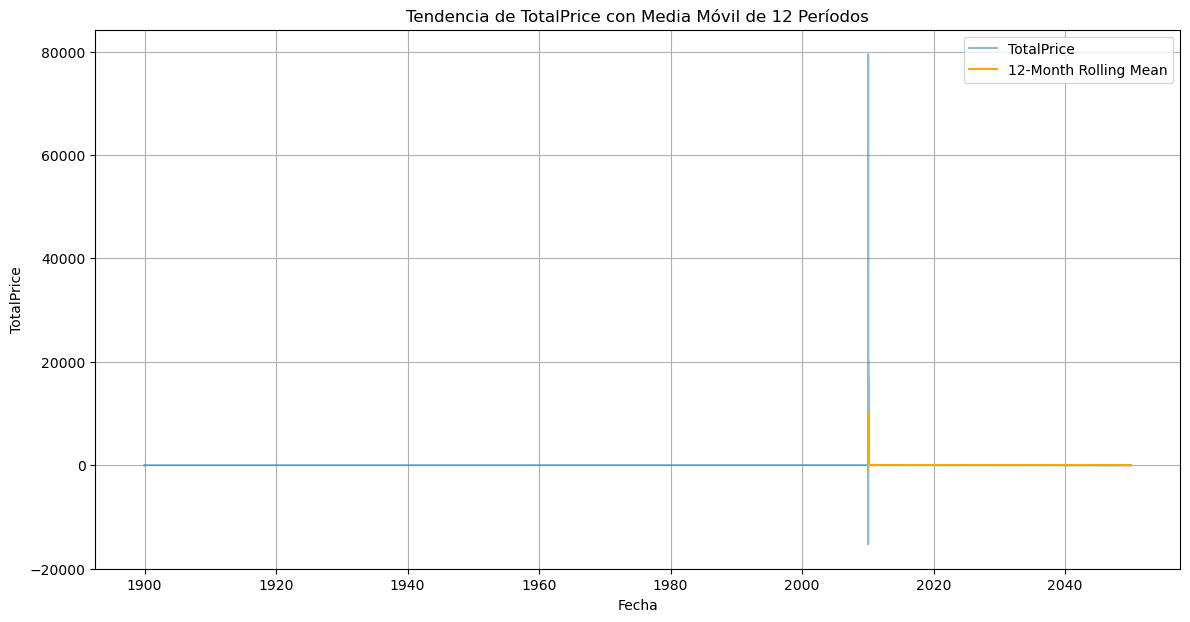

In [428]:
import matplotlib.pyplot as plt

# Tamaño del gráfico
plt.figure(figsize=(14, 7))
# Gráfico de la columna 'TotalPrice'
plt.plot(retail2_df.index, 
         retail2_df['TotalPrice'], 
         label='TotalPrice', 
         alpha=0.5)
# Gráfico de la media móvil 12 periodos
plt.plot(retail2_df.index, retail2_df['TotalPriceMoving12Avg'], 
         label='12-Month Rolling Mean', 
         color='orange')
# Configuración de los ejes y título
plt.xlabel('Fecha')
plt.ylabel('TotalPrice')
plt.title('Tendencia de TotalPrice con Media Móvil de 12 Períodos')
plt.legend()
plt.grid(True)
# Visualización del gráfico
plt.show()

- __Tendencia General__: A pesar de la volatilidad, la media móvil sugiere una tendencia ligeramente creciente en TotalPrice a lo largo del tiempo, especialmente a partir de cierto punto en el siglo XX. Sin embargo, esta tendencia no es muy pronunciada y está marcada por períodos de estabilidad y otros de mayor crecimiento.
- __Anomalía Alrededor de 2010__: Se observa una anomalía significativa en los datos alrededor del año 2010, donde tanto TotalPrice como su media móvil experimentan un pico muy pronunciado. Esto podría indicar un evento o factor externo que causó un aumento abrupto en el valor de TotalPrice.

## Pregunta 37
**Descomposición de series temporales:**
- Descomponga la serie temporal de `TotalPrice` en componentes de tendencia, estacionalidad y ruido.

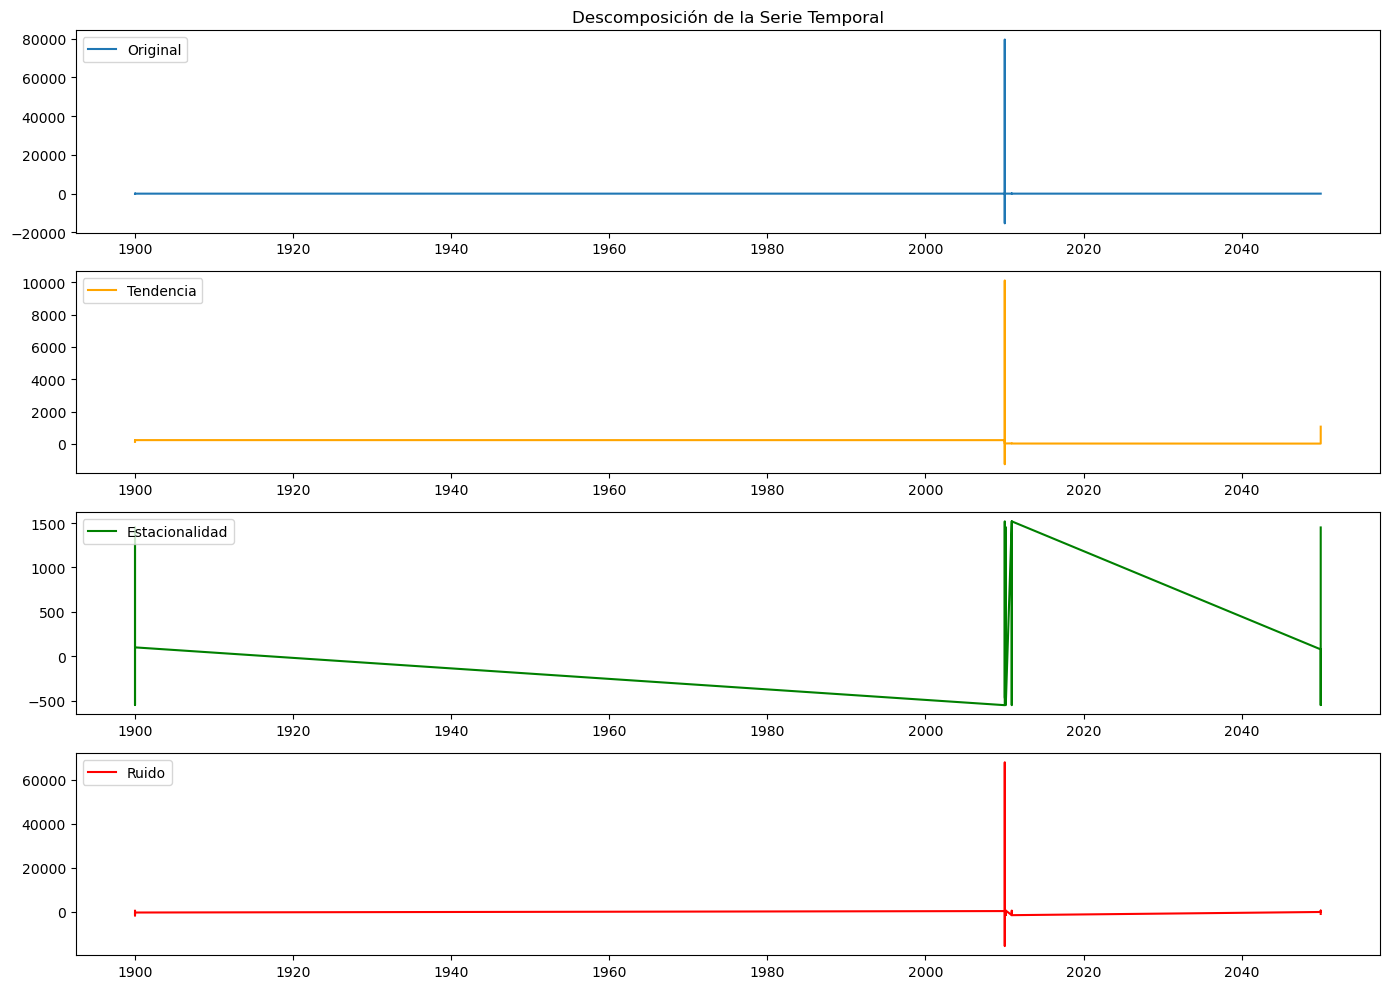

In [429]:
# Importaciones
#   - matplotlib.pyplot
#   - statsmodels.tsa.seasonal 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# La columna 'CleanedInvoiceDate' es el índice datetime del DataFrame
# retail2_df.set_index('CleanedInvoiceDate', inplace=True)
# Ordenación del DF por índice(fecha) para asegurarse de que la serie esté en orden cronológico
retail2_df = retail2_df.sort_index()
# Comprobación de que 'TotalPrice' no contiene valores nulos
retail2_df['TotalPrice'] = retail2_df['TotalPrice'].fillna(0)
# Descomposición de la serie temporal en 12 periodos
decomposition = seasonal_decompose(retail2_df['TotalPrice'], model='additive', period=12)

# Tamaño del gráfico
plt.figure(figsize=(14, 10))
# Gráfico de la serie original
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Descomposición de la Serie Temporal')
# Gráfico de la tendencia
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')
# Gráfico de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')
# Gráfico del residuo
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Ruido', color='red')
plt.legend(loc='upper left')
# Ajuste automático del espaciado entre los subgráficos(subplots) de una figura
plt.tight_layout()
# Visualización del plot
plt.show()

**************

__COMPROBACIÓN DE COLUMNA 'InvoiceNo' DUPLICADA__

_¿QUÉ HACER?_

In [430]:
# Comprobar si hay duplicados en la columna 'InvoiceNo'
duplicates = retail2_df['InvoiceNo'].duplicated()
# Recoger las filas donde 'InvoiceNo' está duplicado
duplicated_rows = retail2_df[duplicates]
# Ver los registros duplicados
duplicated_rows

,InvoiceNo,StockCode,Description,UnitPrice,Quantity,TotalPrice,TotalPriceAvg,TotalPriceMoving12Avg,TotalPriceMoving3Avg,DiscountedPrice,...,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,ShiftedTotalPrice
CleanedInvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-01-12 08:26:00,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6.0,15.30,15.30,231.579167,NaN,13.770,...,47.14,In-Store,Returned,3.30,31x24x99 cm,7.05,Europe,PROMO10,Credit Card,14.85
2010-01-12 08:26:00,536365.0,21730,GLASS STAR FROSTED T-LIGHT HOLDER,425.00,6.0,2550.00,2550.00,232.429167,860.980000,2295.000,...,8.31,Online,Not Returned,1.83,47x68x76 cm,13.56,Australia,SALE15,Gift Card,20.34
2010-01-12 08:26:00,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,8.0,22.00,22.00,14.692500,1071.500000,19.800,...,11.02,Online,Not Returned,9.63,25x13x82 cm,19.87,North America,NaN,Gift Card,3180.00
2010-01-12 08:26:00,536365.0,71053,white metal lantern,3.39,6.0,20.34,20.34,21.304167,25.630000,18.306,...,13.35,Online,Returned,6.47,77x81x40 cm,18.91,Asia,NaN,Credit Card,41.70
2010-01-12 08:26:00,536365.0,84029E,***RED WOOLLY HOTTIE WHITE HEART.***,3.39,6.0,20.34,20.34,NaN,NaN,18.306,...,0.23,Online,Not Returned,6.87,5x33x65 cm,12.90,Australia,SALE15,Bank Transfer,NaN
2010-01-12 08:26:00,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,6.0,20.34,20.34,21.624167,16.446667,18.306,...,11.23,In-Store,Returned,5.25,5x3x53 cm,10.05,Australia,PROMO10,Gift Card,12.50
2010-01-12 08:28:00,536366.0,22633,HAND WARMER UNION JACK,1.85,6.0,11.10,11.10,226.497500,20.200000,9.990,...,43.49,In-Store,Returned,1.79,27x63x17 cm,17.22,Asia,SALE15,Gift Card,29.70
2010-01-12 08:34:00,536367.0,22310,IVORY KNITTED MUG COSY,1.65,6.0,9.90,9.90,17.302500,15.180000,8.910,...,32.94,Online,Returned,1.03,38x51x63 cm,12.79,Australia,PROMO10,PayPal,20.34
2010-01-12 08:34:00,536367.0,21754,"[""description"": ""HOME BUILDING BLOCK WORD""]",5.95,3.0,17.85,17.85,17.752500,6794.450000,16.065,...,1.97,Online,Returned,7.97,57x67x88 cm,14.12,North America,NaN,Credit Card,20340.00


_____

## Pregunta 38
**Interpolación de datos faltantes:**
- Interpole los valores faltantes en la columna `TotalPrice` utilizando la interpolación lineal.

In [431]:
# Verificación de los valores faltantes en la columna 'TotalPrice'
print(retail2_df['TotalPrice'].isna().sum())  # Ver cuántos valores faltantes hay

0


In [432]:
# *** Como no existen valores faltantes, no es necesario aplicar la interpolación lineal

# Interpolación lineal en 'TotalPrice':
#   - rellenará los valores faltantes de forma lineal, 
#       basándose en los valores antes y después de los NaN
# retail2_df['TotalPrice'] = retail2_df['TotalPrice'].interpolate(method='linear')
# Verificación de valores faltantes después de la interpolación
# print(retail2_df['TotalPrice'].isna().sum())

In [433]:
# Visualización 'TotalPrice'
print(retail2_df[['TotalPrice']].head())

                    TotalPrice
CleanedInvoiceDate            
1900-01-01              -59.00
1900-01-01               16.50
1900-01-01               20.34
1900-01-01               25.50
1900-01-01               31.80


## Pregunta 39
**Análisis de autocorrelación:**
- Realice un análisis de autocorrelación en la columna `TotalPrice` del dataset `retail`.

In [434]:
# Importaciones
import matplotlib.pyplot as plt
# También podemo usar 'autocorr()' de pandas
from statsmodels.graphics.tsaplots import plot_acf

In [435]:
# Paso realizado en la pregunta anterior
# Verificamos que no haya valores faltantes
# mediante interpolación lineal de 'TotalPrice'
# retail2_df['TotalPrice'] = retail2_df['TotalPrice'].interpolate(method='linear')

<Figure size 1000x600 with 0 Axes>

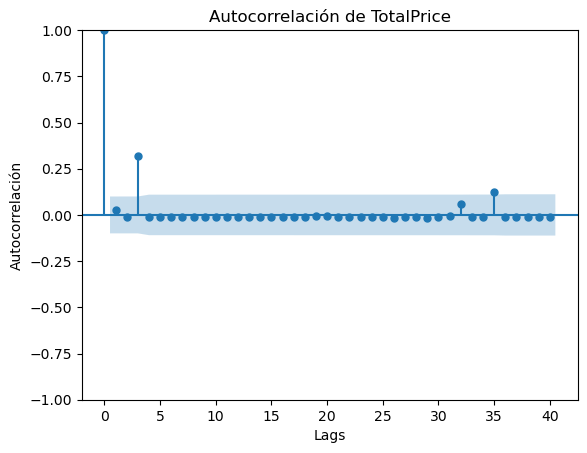

In [436]:
# Plot para análisis de autocorrelación
# 
plt.figure(figsize=(10, 6))
# Correlación de un valor de la serie temporal con sus valores anteriores (lags)
plot_acf(retail2_df['TotalPrice'], lags=40)  # 'lags' define cuántos rezagos (lags) se analizan
# Establecimiento del título
plt.title('Autocorrelación de TotalPrice')
# Establecimiento del título del eje X
plt.xlabel('Lags')
# Establecimiento del título del eje Y
plt.ylabel('Autocorrelación')
# Visualización del plot
plt.show()

__Análisis del gráfico:__

1. **Autocorrelación en el lag 0**:
   - El valor en lag 0 es siempre 1, porque es la correlación de la serie con ella misma.

2. **Picos en los primeros lags**:
   - Se observa un pico en los primeros lags, lo que indica que los valores del `TotalPrice` están correlacionados con valores cercanos en el tiempo, pero esta correlación disminuye rápidamente.

3. **Comportamiento en otros lags**:
   - A medida que aumenta el lag, la autocorrelación disminuye y tiende hacia cero.
   - Algunos valores fuera del intervalo de confianza sugieren posibles relaciones a ciertos lags, aunque en su mayoría la autocorrelación parece no ser significativa en lags mayores.

4. **Intervalos de confianza**:
   - La zona sombreada indica el intervalo de confianza. Si los puntos caen dentro de esta área, la autocorrelación no es estadísticamente significativa. Algunos puntos están fuera de este intervalo, lo que indica autocorrelación significativa en esos casos.

En resumen, el análisis sugiere que hay cierta correlación a corto plazo en los valores de `TotalPrice`, pero a medida que aumentan los lags, la autocorrelación desaparece.

## Pregunta 40
**Conversión de zona horaria:**
- Convierta las fechas en la columna `InvoiceDate` a una zona horaria específica (por ejemplo, UTC) en el dataset `retail`.


In [437]:
# A) SI 'CleanedInvoiceDate' NO ES ÍNDICE:

# La columna 'CleanedInvoiceDate' ya ha sido convertida en tipo 'datetime'
# retail2_df['CleanedInvoiceDate'] = pd.to_datetime(retail2_df['CleanedInvoiceDate'])

# Establecimiento de la zona horaria actual para 'Europe/Madrid'
# retail2_df['CleanedInvoiceDate'] = retail2_df['CleanedInvoiceDate'].dt.tz_localize('Europe/Madrid')
# Conversión a la zona horaria UTC
# retail2_df['CleanedInvoiceDate'] = retail2_df['CleanedInvoiceDate'].dt.tz_convert('UTC')
# Verificación cambios
# print(retail2_df[['CleanedInvoiceDate']].head())

In [438]:
# Comprobamos los índices del DF
print(retail2_df.index.name)
# retail2_df.head()

CleanedInvoiceDate


In [439]:
# Verificación en índice antes de cambio zona horaria
print(retail2_df.index)

DatetimeIndex(['1900-01-01 00:00:00', '1900-01-01 00:00:00',
               '1900-01-01 00:00:00', '1900-01-01 00:00:00',
               '1900-01-01 00:00:00', '1900-01-01 00:00:00',
               '1900-01-01 00:00:00', '1900-01-01 00:00:00',
               '1900-01-01 00:00:00', '1900-01-01 00:00:00',
               ...
               '2050-01-01 00:00:00', '2050-01-01 00:00:00',
               '2050-01-01 00:00:00', '2050-01-01 00:00:00',
               '2050-01-01 00:00:00',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='CleanedInvoiceDate', length=386, freq=None)


In [440]:
# B) SI 'CleanedInvoiceDate' ES ÍNDICE:
# Si CleanedInvoiceDate ya es el índice, aplicamos la conversión directamente al índice

# Localización de la zona horaria original('Europe/Madrid')
retail2_df.index = retail2_df.index.tz_localize('Europe/Madrid')
# Conversión a la zona horaria UTC
retail2_df.index = retail2_df.index.tz_convert('UTC')
# Verificación en índice después de cambio zona horaria
print(retail2_df.index)


DatetimeIndex(['1900-01-01 00:15:00+00:00', '1900-01-01 00:15:00+00:00',
               '1900-01-01 00:15:00+00:00', '1900-01-01 00:15:00+00:00',
               '1900-01-01 00:15:00+00:00', '1900-01-01 00:15:00+00:00',
               '1900-01-01 00:15:00+00:00', '1900-01-01 00:15:00+00:00',
               '1900-01-01 00:15:00+00:00', '1900-01-01 00:15:00+00:00',
               ...
               '2049-12-31 23:00:00+00:00', '2049-12-31 23:00:00+00:00',
               '2049-12-31 23:00:00+00:00', '2049-12-31 23:00:00+00:00',
               '2049-12-31 23:00:00+00:00',                       'NaT',
                                     'NaT',                       'NaT',
                                     'NaT',                       'NaT'],
              dtype='datetime64[ns, UTC]', name='CleanedInvoiceDate', length=386, freq=None)


# Parte 5 Preguntas de Negocio

## Pregunta 1
**Análisis de Retorno de Productos:**
- ¿Cuál es el porcentaje de productos devueltos por país (United Kingdom, Germany, Denmark)? ¿Hay alguna diferencia notable entre los países?

In [452]:
# Número total de Filas por País

# Filtrado de filas con devoluciones
returned_df = retail2_df[retail2_df['ReturnStatus'] == 'Returned']
# Conteo total de filas por país
total_by_country = retail2_df.groupby('CleanedCountry').size()
# Visualización
print(total_by_country)


CleanedCountry
United Kingdom                               140
box of vintage alphabet blocks                 1
box of vintage jigsaw blocks                   1
chocolate hot water bottle                     1
denmark                                      113
england                                        4
feltcraft princess charlotte doll              1
germany                                      119
knitted union flag hot water bottle            1
red harmonica in box                           1
scandinavian reds ribbons                      2
striped charlielola charlotte bag details      1
dtype: int64


In [449]:
# Número de devoluciones por país
returned_by_country = returned_df.groupby('CleanedCountry').size()
print(returned_by_country)

CleanedCountry
United Kingdom                       72
chocolate hot water bottle            1
denmark                              48
england                               3
feltcraft princess charlotte doll     1
germany                              61
scandinavian reds ribbons             2
dtype: int64


In [450]:
# Porcentaje de devoluciones por país
percentage_returned_by_country = (returned_by_country / total_by_country) * 100
print(percentage_returned_by_country)

CleanedCountry
United Kingdom                                51.428571
box of vintage alphabet blocks                      NaN
box of vintage jigsaw blocks                        NaN
chocolate hot water bottle                   100.000000
denmark                                       42.477876
england                                       75.000000
feltcraft princess charlotte doll            100.000000
germany                                       51.260504
knitted union flag hot water bottle                 NaN
red harmonica in box                                NaN
scandinavian reds ribbons                    100.000000
striped charlielola charlotte bag details           NaN
dtype: float64


## Pregunta 2
**Impacto de Promociones:**
- ¿Qué porcentaje de las ventas totales se realizaron utilizando códigos de promoción en cada uno de los tres países? ¿Cuál es el código de promoción más efectivo?

## Pregunta 3
**Canales de Venta:**
- ¿Cuál es la distribución de ventas entre los diferentes canales de venta (`SaleChannel`) en cada país? ¿Hay un canal que sea predominantemente más utilizado en alguno de los países?

## Pregunta 4
**Costos de Envío:**
- ¿Cuál es el costo promedio de envío por país? ¿Existen diferencias significativas en los costos de envío entre los tres países?

## Pregunta 5
**Peso del Producto y Costos de Envío:**
- ¿Existe una correlación entre el peso del producto (`ProductWeight`) y el costo de envío (`ShippingCost`)? ¿Cómo varía esta relación entre los diferentes países?

## Pregunta 6
**Descuentos y Comportamiento de Compra:**
- ¿Qué porcentaje de las compras en cada país se realizaron con algún tipo de descuento (`Discount`)? ¿Los clientes en algún país en particular son más propensos a utilizar descuentos?

## Pregunta 7
**Análisis de Categorías de Productos:**
- ¿Cuáles son las categorías de productos (`Category`) más vendidas en cada país? ¿Existen diferencias en las preferencias de categorías de productos entre los países?

## Pregunta 8
**Rendimiento de Proveedores:**
- ¿Cuál es el proveedor (`Supplier`) con el mayor volumen de ventas en cada país? ¿Cómo se distribuyen las ventas entre los diferentes proveedores en cada uno de los países?

## Pregunta 9
**Promedio de Precios de Venta:**
- ¿Cuál es el precio promedio de venta (`UnitPrice`) de los productos en cada país? ¿Existen diferencias significativas en los precios de venta entre los tres países?

## Pregunta 10
**Tendencias de Venta por Región:**
- ¿Cómo se distribuyen las ventas (`TotalPrice`) por región de ventas (`SalesRegion`) dentro de cada país? ¿Hay alguna región que destaque en términos de volumen de ventas en alguno de los países?

## Pregunta 11
**Análisis de Frecuencia de Compras:**
- ¿Cuál es la frecuencia promedio de compras por cliente (`CustomerID`) en cada país? ¿Los clientes en algún país compran con mayor frecuencia?


## Pregunta 12
**Valor de Vida del Cliente:**
- ¿Cuál es el valor promedio de vida del cliente (suma de `TotalPrice`) en cada país? ¿Existe una diferencia significativa en el valor de vida del cliente entre los tres países?

## Pregunta 13
**Métodos de Pago:**
- ¿Cuál es el método de pago (`PaymentMethod`) más utilizado en cada país? ¿Hay una preferencia notable por ciertos métodos de pago en algún país específico?

## Pregunta 14
**Evaluación de la Eficiencia de Descuentos:**
- ¿Qué impacto tienen los descuentos (`Discount`) en el valor total de las ventas en cada país? ¿Los descuentos resultan en un aumento significativo en el volumen de ventas?

## Pregunta 15
**Análisis de Clientes por Región:**
- ¿Cuál es la distribución de clientes (`CustomerID`) por región de ventas (`SalesRegion`) en cada país? ¿Hay regiones con una concentración notablemente mayor de clientes?

## Pregunta 16
**Promociones y Segmentos de Mercado:**
- ¿Cuál es el código de promoción (`PromotionCode`) más utilizado en cada segmento de mercado (`SalesRegion`) dentro de cada país?

## Pregunta 17
**Análisis de Temporadas de Venta:**
- ¿Existen patrones estacionales en las ventas (`InvoiceDate`) en cada país? ¿Hay picos de ventas en ciertos meses o temporadas en alguno de los países?

## Pregunta 18
**Preferencias de Productos:**
- ¿Cuáles son los productos (`StockCode` y `Description`) más vendidos en cada país? ¿Hay diferencias notables en las preferencias de productos entre los países?

## Pregunta 19
**Impacto de las Devoluciones en las Ventas:**
- ¿Qué porcentaje de las ventas totales son afectadas por devoluciones (`ReturnStatus`)? ¿Cómo varía este porcentaje entre los diferentes países?

## Pregunta 20
**Análisis de Margen de Ganancia:**
- ¿Cuál es el margen de ganancia promedio (`UnitPrice - Discount`) por producto en cada país? ¿Hay productos o categorías con márgenes significativamente mayores o menores en alguno de los países?